
<img src="fga.png" width="1200" height="400">


<h1><center>Aula Extra 1 - Leitura de Dados e Exploratory Data Analysis (EDA)
</center></h1>

Sempre que iniciamos um projeto de aprendizado de máquina (ML) ou modelagem estatística, precisamos primeiro fazer uma análise exploratória de dados (EDA). Isso inclui coisas como: plotagens de dados brutos, histogramas e muito mais ...

<ul>
    <li> <b>Sinais Financeiros - UnB</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li> </a>
    <li> <b>19/02/2021</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Leitura 1">Leitura de preços - investpy</a></li>
        <li><a href="#Leitura 2">Leitura de preços - Dados Pagos</a></li>
        <li><a href="#Leitura 3">Leitura de preços - MetaTrader</a></li>
        <li><a href="#Graficos"> Representações Gráficas do preço e do retorno </a></li>
    </ol>
</div>
<br>
<hr>

<h2>Bibliotecas de Refência</h2>

In [1]:
import pandas as pd
#import investpy
import yfinance as yf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
plt.style.use('dark_background')


<div id="Leitura 1">
    <h2>1) Leitura de preços - Método 1: investpy</h2>
</div>

In [2]:
df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
df[0]['Código'].values

array(['ABEV3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
       'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5',
       'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3',
       'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3',
       'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11',
       'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4',
       'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4',
       'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3',
       'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4',
       'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3',
       'SULA11', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
       'VALE3', 'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3',
       'Quantidade Teórica Total  Redutor'], dtype=object)

In [3]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)


2021-08-15 2019-08-16


In [4]:
yf.download('RENT3.SA', start=str(yesterdayB), end=str(todayB)) 

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-08-16  41.666664  42.847618  41.123810  42.847618  42.198235  3676050
2019-08-19  43.238094  43.333332  42.133331  42.619045  41.973125  3507315
2019-08-20  42.619045  42.619045  41.571426  42.171429  41.532295  4588395
2019-08-21  42.857143  43.495239  42.409523  43.238094  42.582794  3711120
2019-08-22  43.514286  43.514286  42.390476  42.504761  41.860573  2729685
...               ...        ...        ...        ...        ...      ...
2021-08-09  58.200001  59.439999  57.849998  58.599998  58.599998  6182500
2021-08-10  58.750000  58.970001  57.110001  57.430000  57.430000  5361200
2021-08-11  57.080002  57.910000  56.360001  57.389999  57.389999  8680700
2021-08-12  56.599998  58.889999  56.320000  58.070000  58.070000  9679000
2021-08-13  58.310001  58.310001  56.730000  57.450001  57.450001  6882000

[492 rows x 6 columns]

In [5]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
symbols=[sy+".SA" for sy in symbols[:-1]]

#symbols=[sy+".sa" for sy in symbols[:-1]]
np.array(symbols)

array(['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA',
       'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA',
       'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA',
       'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA',
       'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA',
       'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA',
       'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA',
       'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA',
       'JHSF3.SA', 'KLBN11.SA', 'LAME4.SA', 'LCAM3.SA', 'LREN3.SA',
       'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA',
       'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA', 'QUAL3.SA',
       'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA',
       'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', '

In [6]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)

outClose, outHigh, outLow = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
        dfOutHigh  = df['High']
        dfOutLow   = df['Low']
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)
        outHigh = pd.concat([outHigh,dfOutHigh],axis=1)        
        outLow  = pd.concat([outLow, dfOutLow],axis=1)  
        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
outHigh.columns=cols
outLow.columns=cols

2021-08-15 2019-08-16


  0%|          | 0/82 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
output=outClose.copy()

In [8]:
output.head()

ABEV3.SA  ASAI3.SA   AZUL4.SA   B3SA3.SA   BBAS3.SA  \
2019-08-16 00:00:00  18.900000       NaN  50.470001  14.833333  45.730000   
2019-08-19 00:00:00  19.110001       NaN  49.830002  15.166666  44.830002   
2019-08-20 00:00:00  18.940001       NaN  49.680000  15.253333  44.790001   
2019-08-21 00:00:00  18.799999       NaN  50.849998  15.273333  47.349998   
2019-08-22 00:00:00  18.469999       NaN  48.939999  15.156666  46.650002   

                      BBDC3.SA   BBDC4.SA   BBSE3.SA  BEEF3.SA  BPAC11.SA  \
2019-08-16 00:00:00  24.454544  30.245455  33.240002  8.092516  15.362500   
2019-08-19 00:00:00  24.049585  29.809090  33.150002  8.092516  15.950000   
2019-08-20 00:00:00  23.801653  29.518181  33.080002  7.954854  16.375000   
2019-08-21 00:00:00  24.388430  30.100000  33.290001  7.984353  16.597500   
2019-08-22 00:00:00  23.884296  29.709089  32.599998  8.259676  16.799999   

                     ...  TAEE11.SA  TIMS3.SA   TOTS3.SA   UGPA3.SA  USIM5.SA  \
2019-08-16 00:00:00  ...  27.600000     12.08  17.763332  16.500000      7.30   
2019-08-19 00:00:00  ...  27.379999     11.98  17.783333  15.850000      7.06   
2019-08-20 00:00:00  ...  27.000000     11.84  17.903334  15.840000      7.27   
2019-08-21 00:00:00  ...  27.530001     11.97  18.143333  16.719999      7.43   
2019-08-22 00:00:00  ...  27.670000     11.86  17.766666  17.139999      7.51   

                      VALE3.SA   VIVT3.SA  VVAR3.SA  WEGE3.SA   YDUQ3.SA  
2019-08-16 00:00:00  43.689999  43.500000      7.12    11.400  31.410000  
2019-08-19 00:00:00  43.650002  43.099998      6.73    11.270  31.280001  
2019-08-20 00:00:00  43.840000  44.730000      7.06    11.300  32.709999  
2019-08-21 00:00:00  44.150002  45.180000      7.18    11.530  32.849998  
2019-08-22 00:00:00  43.889999  45.099998      6.90    11.365  32.509998  

[5 rows x 82 columns]

<AxesSubplot:>

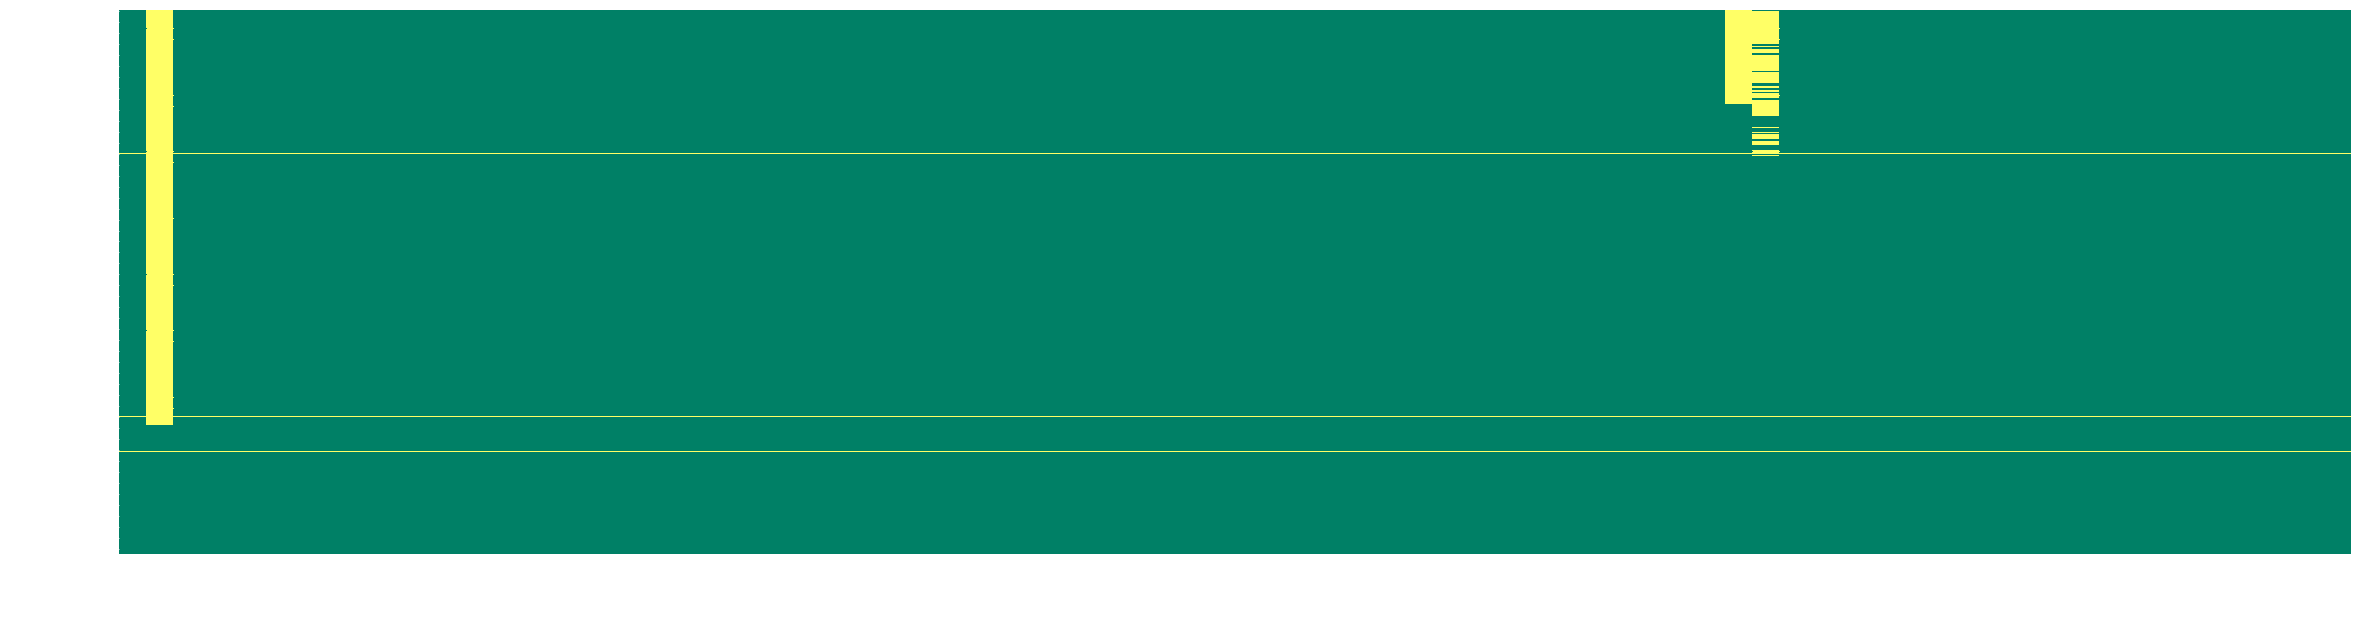

In [9]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

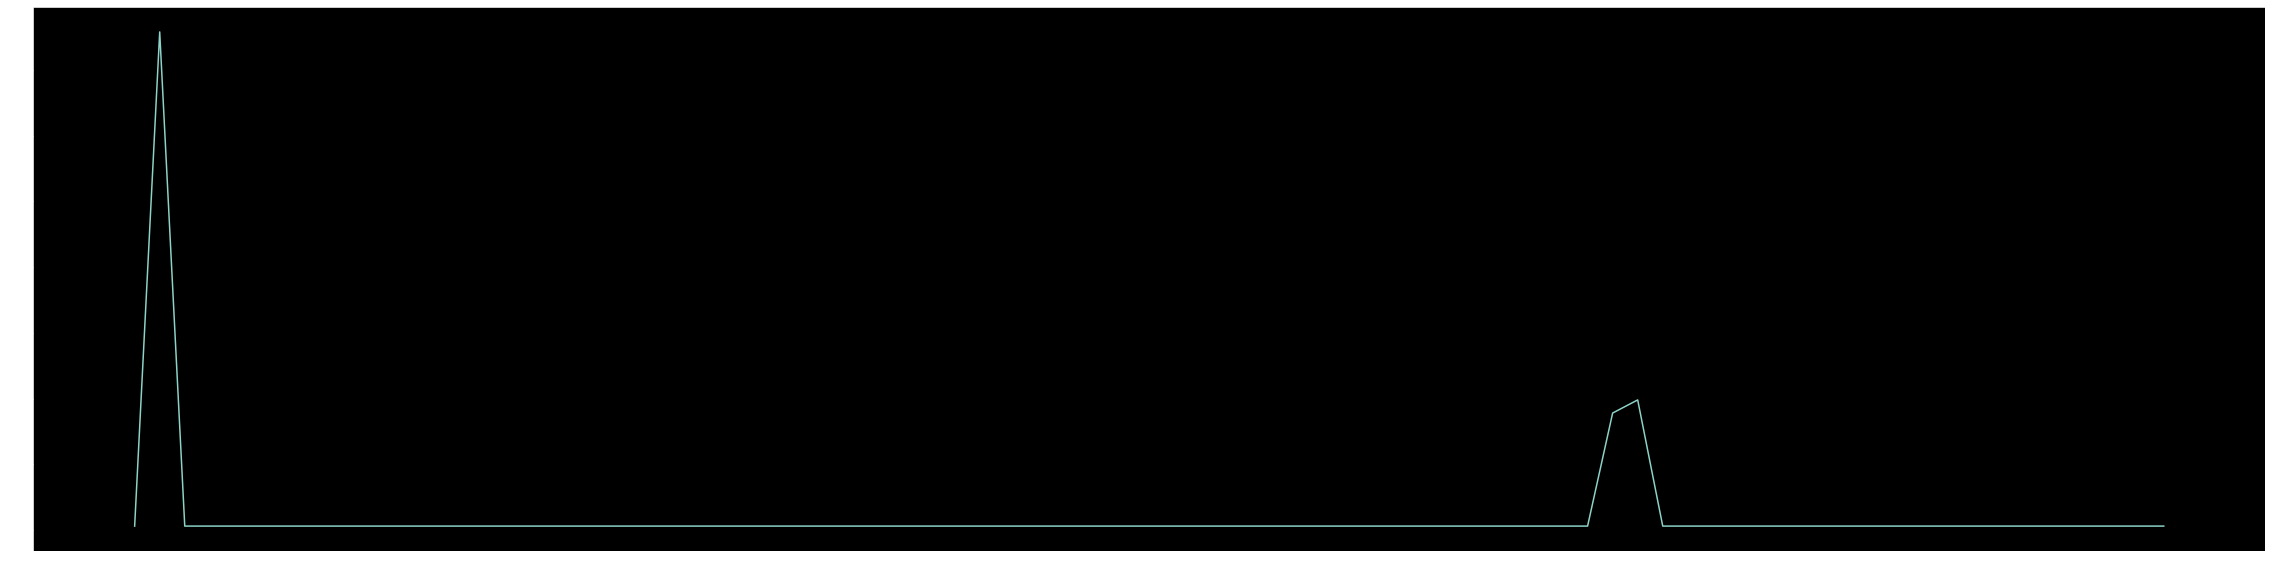

In [10]:

plt.figure(figsize=(40,10))
plt.plot(cols ,output.isnull().sum().values)

<AxesSubplot:>

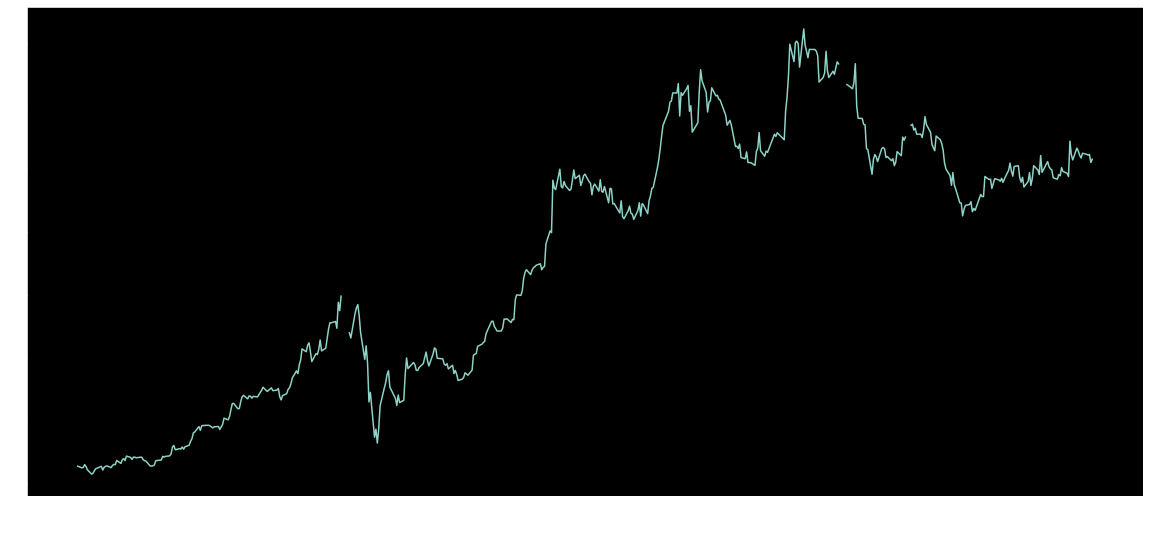

In [11]:
output['WEGE3.SA'].plot(figsize=(20,10))

<div id="Leitura 2">
    <h2>2) Leitura de preços - Método 2: Dados Pagos</h2>
</div>

In [12]:
from os import listdir
from os.path import isfile, join

dir_data='./data_csv/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
len(csvs)

41

<AxesSubplot:ylabel='index'>

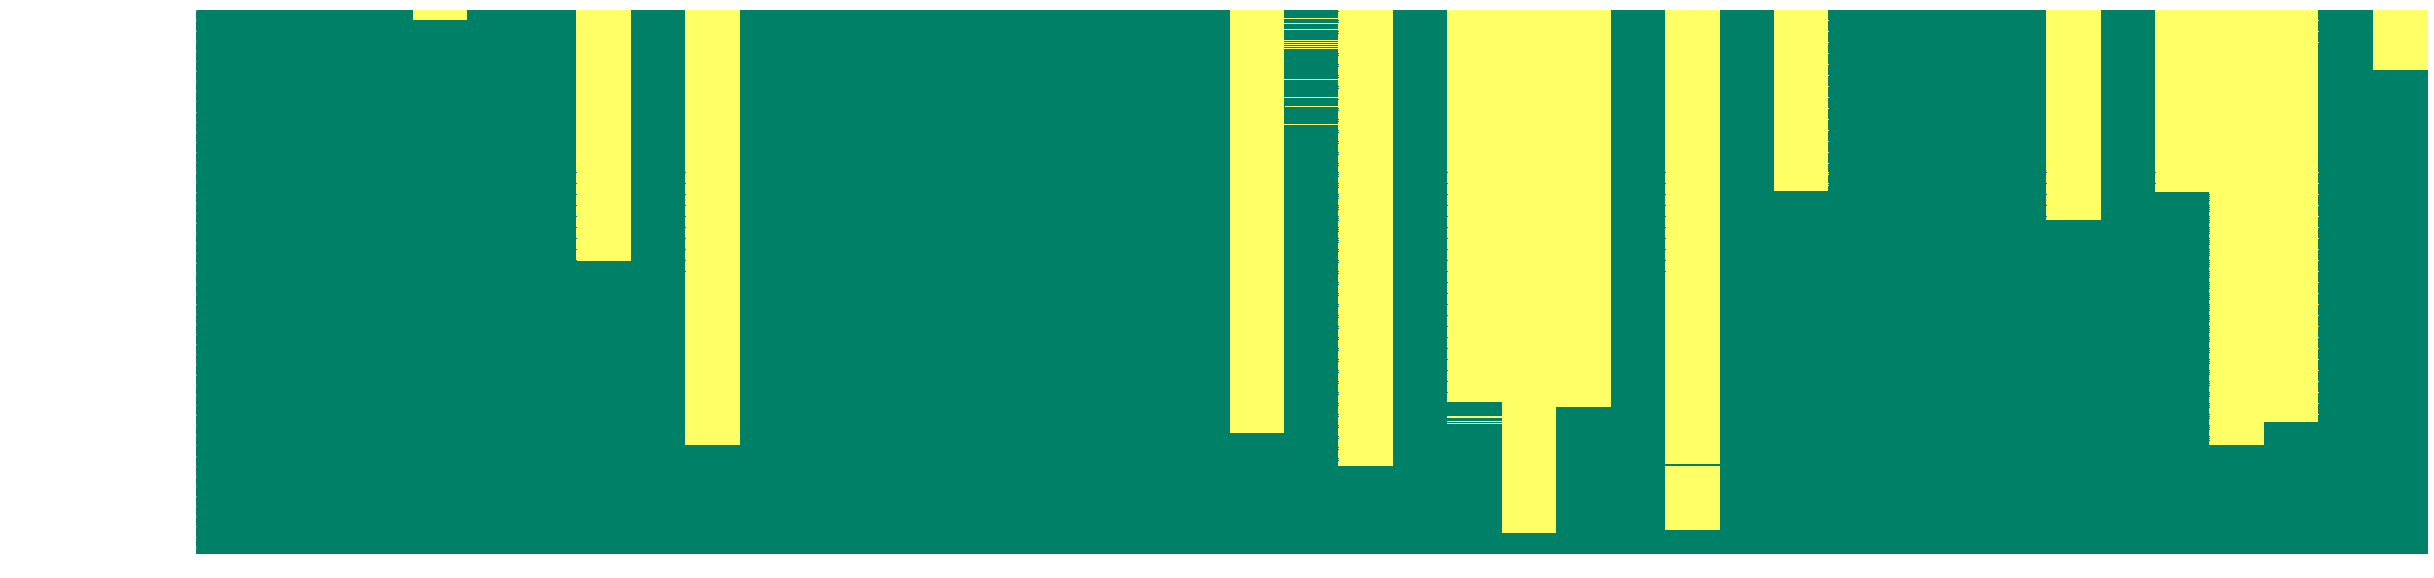

In [13]:
li = []
for csv in csvs:
    df = pd.read_csv(dir_data+csv, index_col=None, header=None)
    li.append(df[[0,4]][1:])

output = None

for i in range(len(li)):

    if output is None:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
   #     df['date']=[pd.to_datetime(df['date'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(df))]
        df=df.set_index('date')
        output=df

    else:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
    #    
        df=df.set_index('date')
        output=pd.concat([output,df],axis=1) 
output.reset_index( inplace=True)        
output['index']=[pd.to_datetime(output['index'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(output))]        
output=output.sort_values(by='index')
output=output.set_index('index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

In [14]:
output.tail()

AMAR3  ABCB4  BRKM5  CPLE6  BRPR3  ALPA4  CSAN3 BPAN4  BTOW3  \
index                                                                      
2019-12-10  11.40  18.91  29.13  65.29  13.98  32.00  66.34  9.30  61.30   
2019-12-11  11.61  18.97  29.33  65.03  14.40  33.08  68.51  9.28  61.40   
2019-12-12  11.79  19.48  29.29  64.80  14.58  32.30  68.95  9.30  64.61   
2019-12-13  11.72  19.36  29.13  65.49  14.64  33.20  69.30  9.62  66.20   
2019-12-16  11.80  19.36  28.64  66.01  14.48  32.99  69.33  9.55  66.54   

            BKBR3  ...  CCRO3 CIEL3  BBAS3  ANIM3  COGN3  BBSE3  BRDT3  CRFB3  \
index              ...                                                          
2019-12-10  15.90  ...  17.15  8.10  47.77  24.28  11.16  36.19  27.24  19.53   
2019-12-11  15.86  ...  17.30  8.25  47.70  24.84  11.95  36.35  27.52  20.07   
2019-12-12  16.10  ...  17.28  8.40  48.91  26.51  12.10  36.50  27.80  20.98   
2019-12-13  16.60  ...  17.54  8.78  48.53  27.97  12.20  37.35  27.52  20.80   
2019-12-16  17.13  ...  17.77  8.33  47.87  28.04  12.10  36.82  28.50  21.02   

            BRAP4  ARZZ3  
index                     
2019-12-10  36.15  66.60  
2019-12-11  36.40  66.00  
2019-12-12  36.99  65.63  
2019-12-13  37.82  65.60  
2019-12-16  37.75  64.70  

[5 rows x 41 columns]

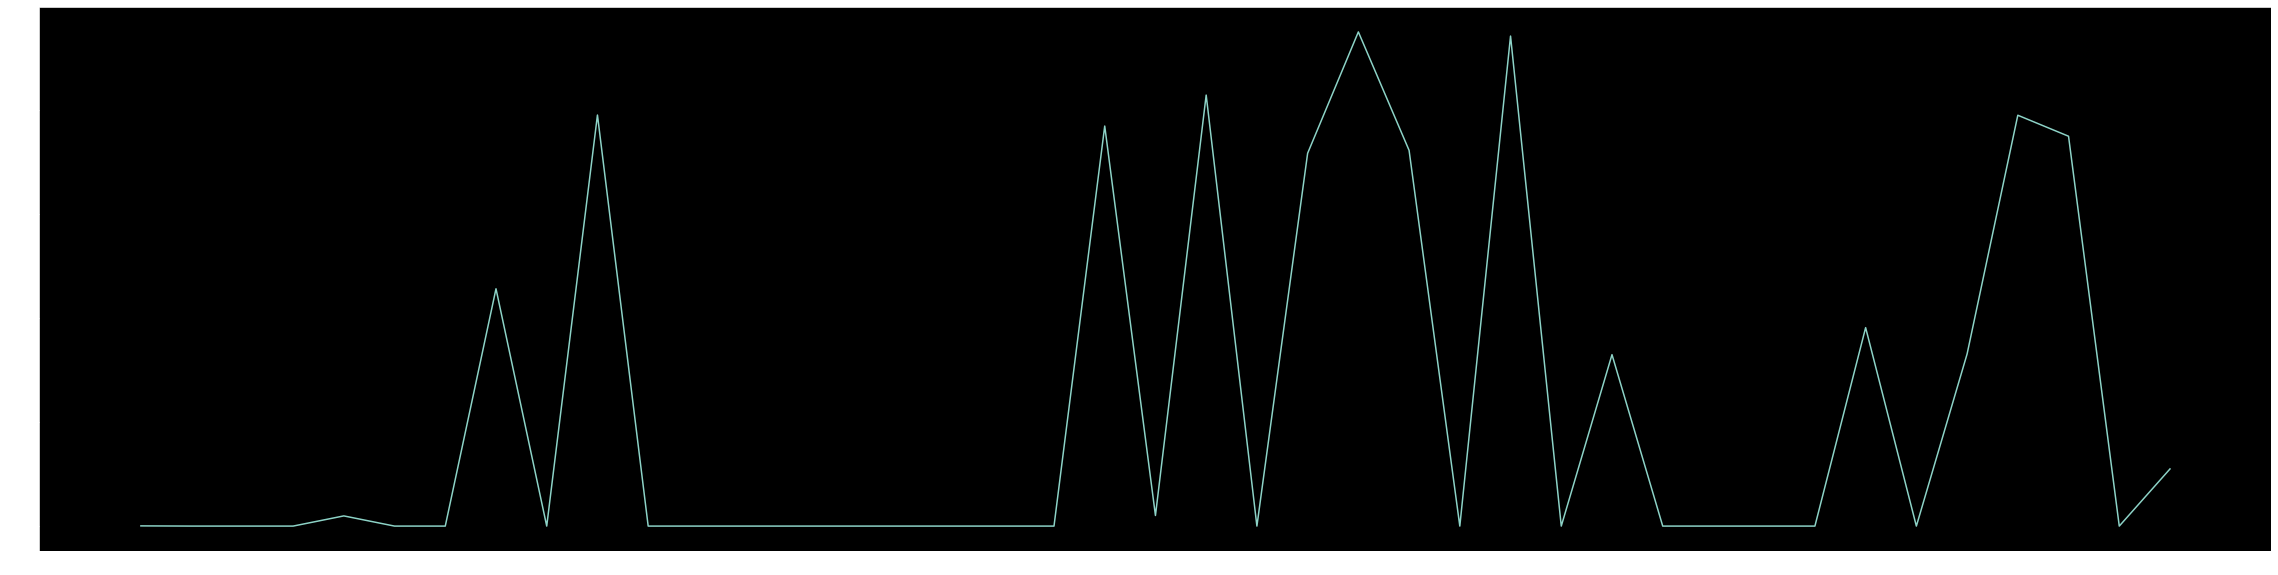

In [15]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

In [16]:
list(output.columns[output.isnull().sum()>0.1*len(output)])

['BPAN4',
 'BKBR3',
 'CAML3',
 'BIDI4',
 'BPAC1',
 'ALSO3',
 'AZUL4',
 'BIDI1',
 'ALUP1',
 'ANIM3',
 'BBSE3',
 'BRDT3',
 'CRFB3',
 'ARZZ3']

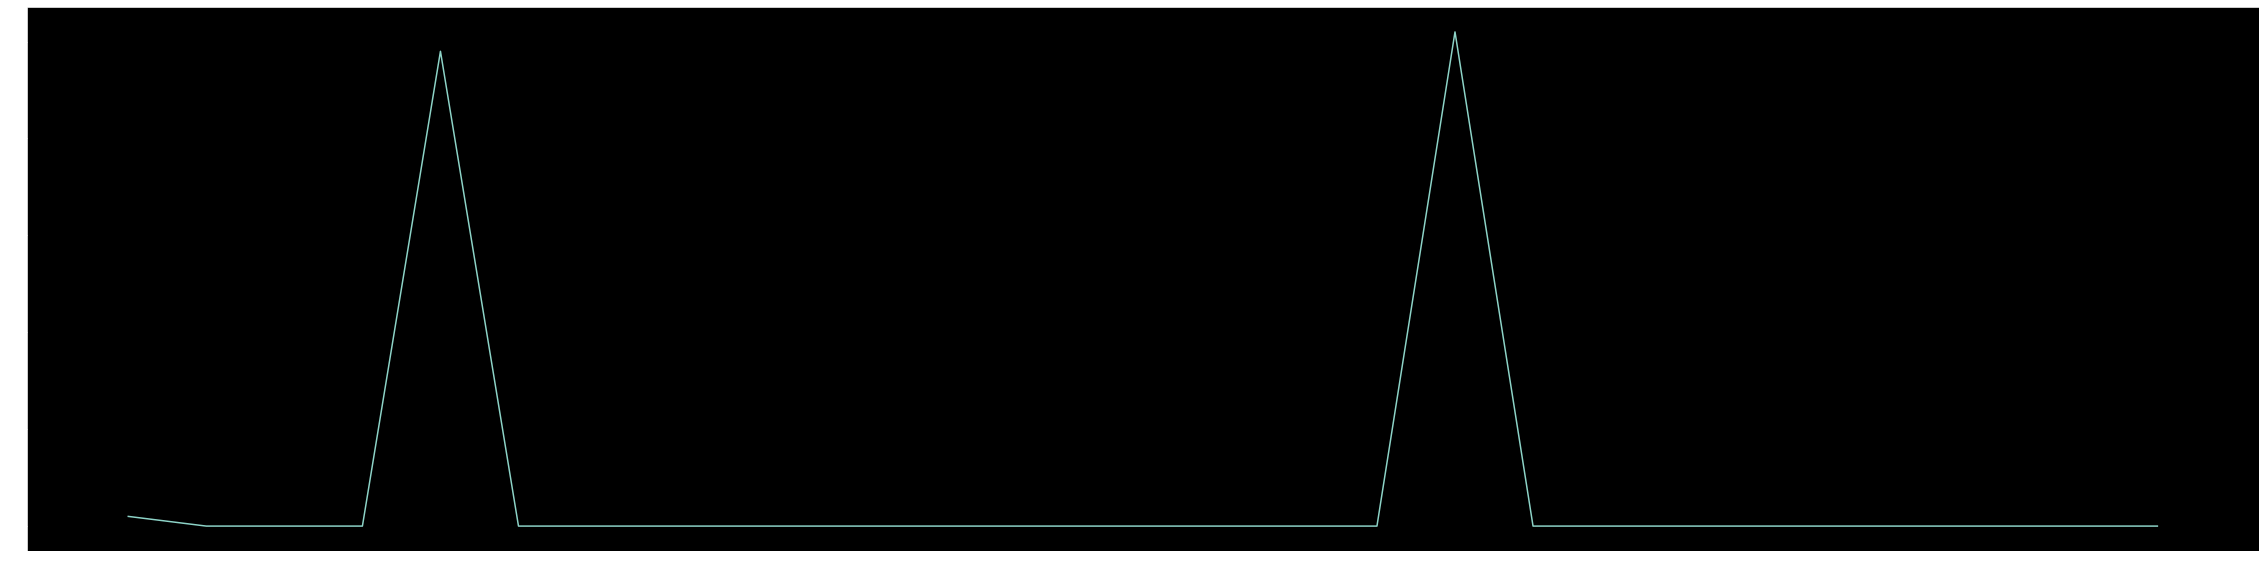

In [17]:
cols_remove=list(output.columns[output.isnull().sum()>0.1*len(output)])
output.drop(cols_remove, axis=1,inplace=True)
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

<AxesSubplot:ylabel='index'>

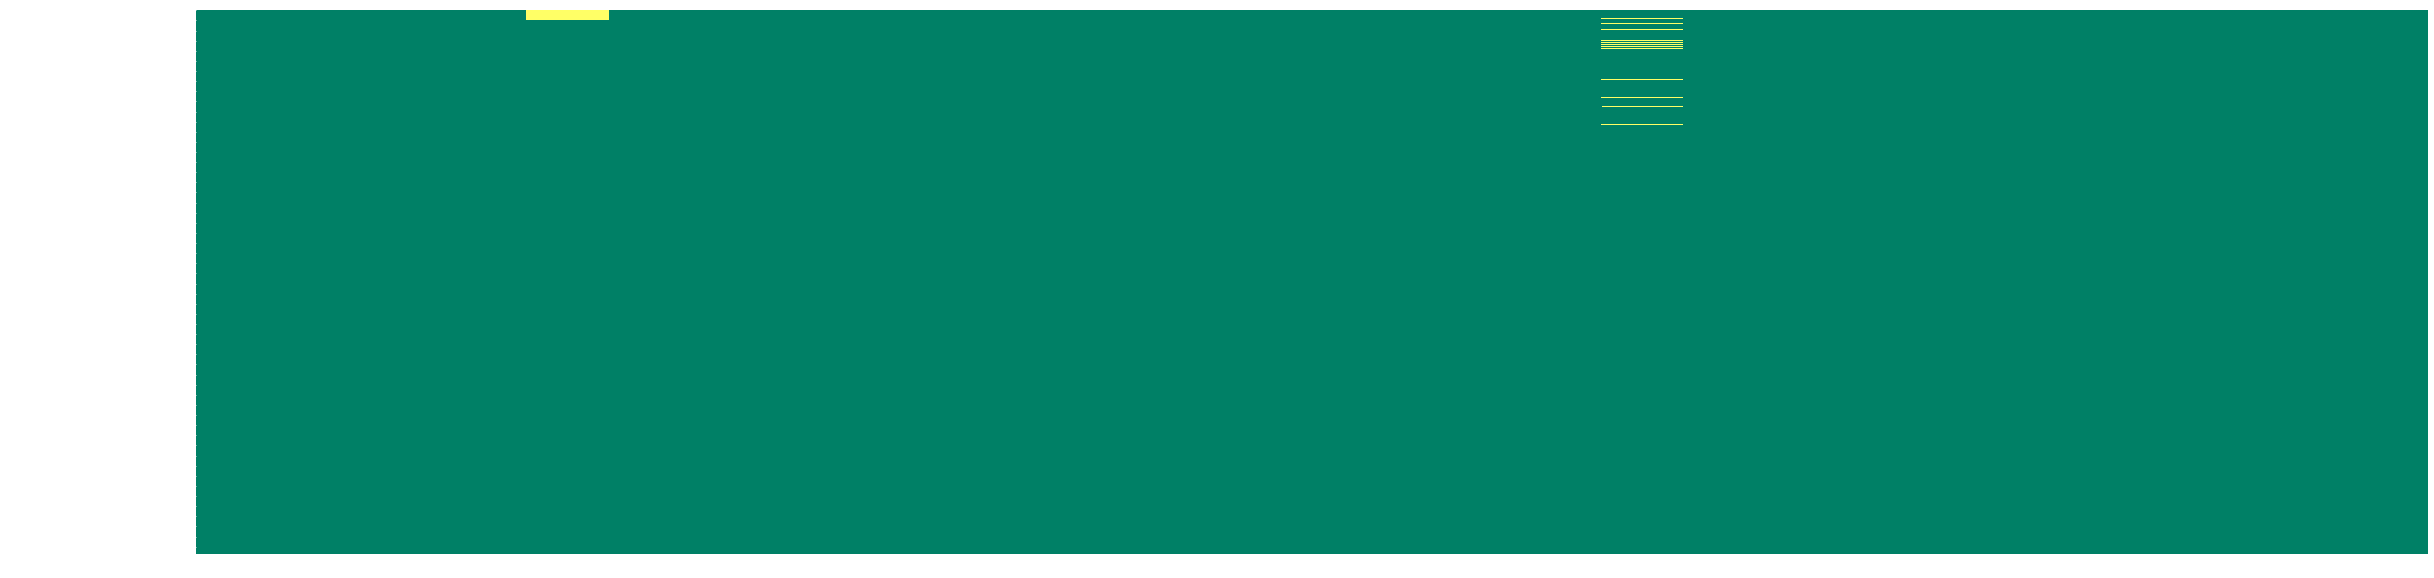

In [18]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

['Erros', 0, 'Ativos', 24]

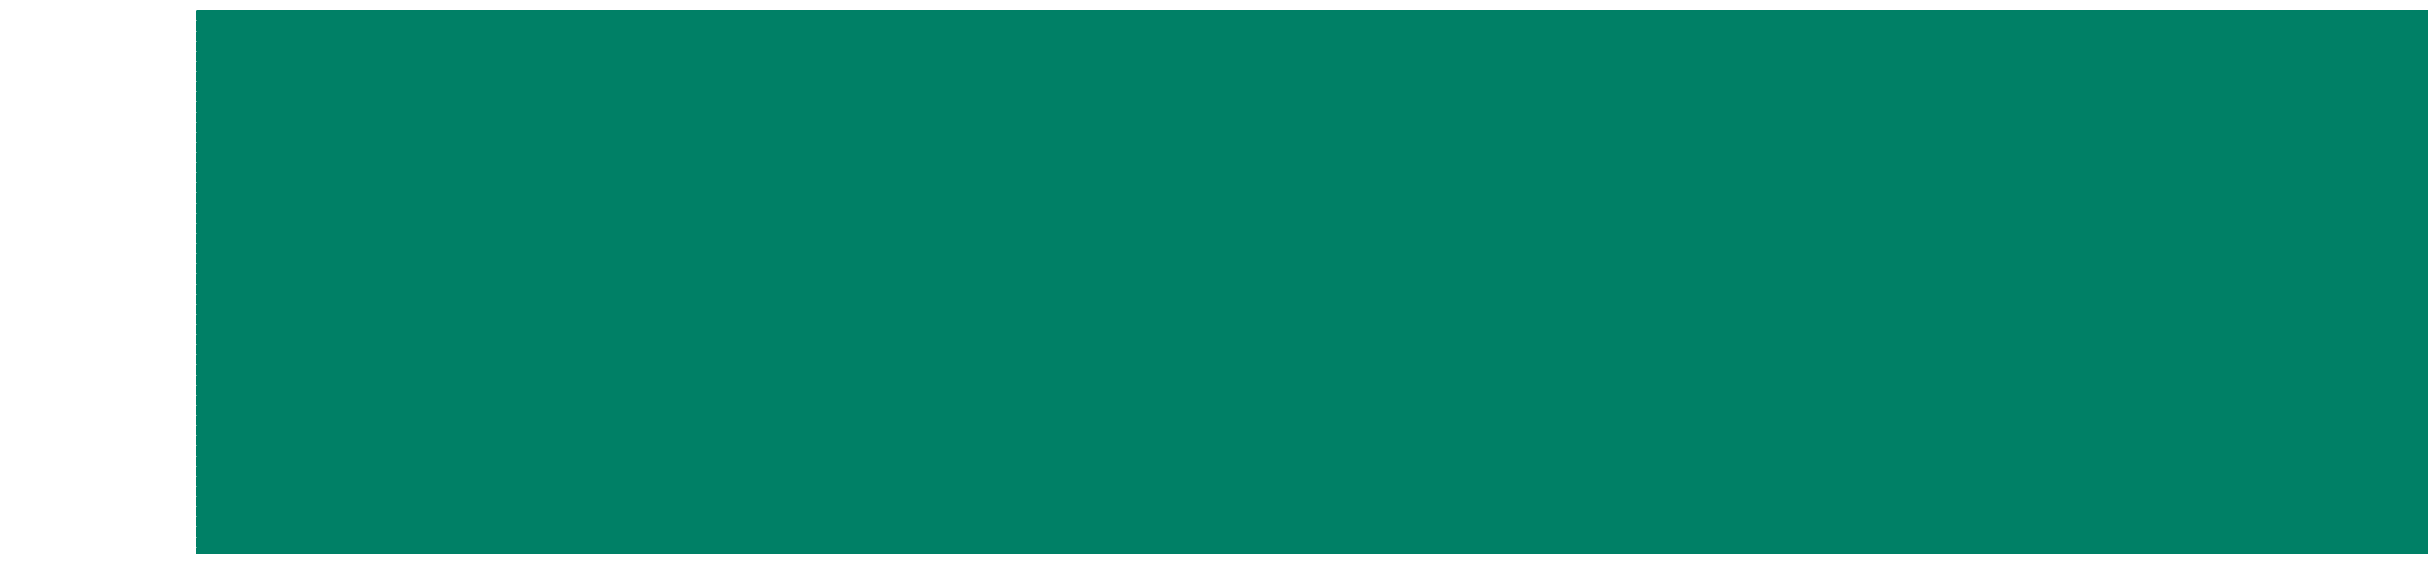

In [19]:
import numpy as np
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<div id="Leitura 3">
    <h2>3) Leitura de preços - Método 3: MetaTrader</h2>
</div>

In [20]:
dir_data='./data_mt5/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
li = []
import csv
from csv import reader
print(csv.__file__)
output = None


for csv in csvs:
    price=[]
    with open(dir_data+csv, 'r', encoding="utf16") as csvfile:
        readCSV = reader(csvfile, delimiter=',')
        for row in readCSV:
            price.append([row[0].split('\t')[0][0:10],row[0].split('\t')[1]])
        df=pd.DataFrame(price)
        df.columns=['data',csv[:-4]]
        df=df.set_index('data')

        if output is None:
            output=df
        else:
            output=pd.concat([output,df],axis=1) 

output=output.astype(float)    
output[["PETR3","GGBR4","LAME4","WEGE3"]].dropna().tail()


/usr/lib/python3.6/csv.py


PETR3  GGBR4  LAME4  WEGE3
2020.06.05  22.62  15.17  29.70  44.22
2020.06.09  22.46  14.96  30.25  45.69
2020.06.12  21.03  13.88  31.30  44.14
2020.06.15  21.11  13.55  31.80  44.16
2020.06.16  21.98  14.80  31.56  44.65

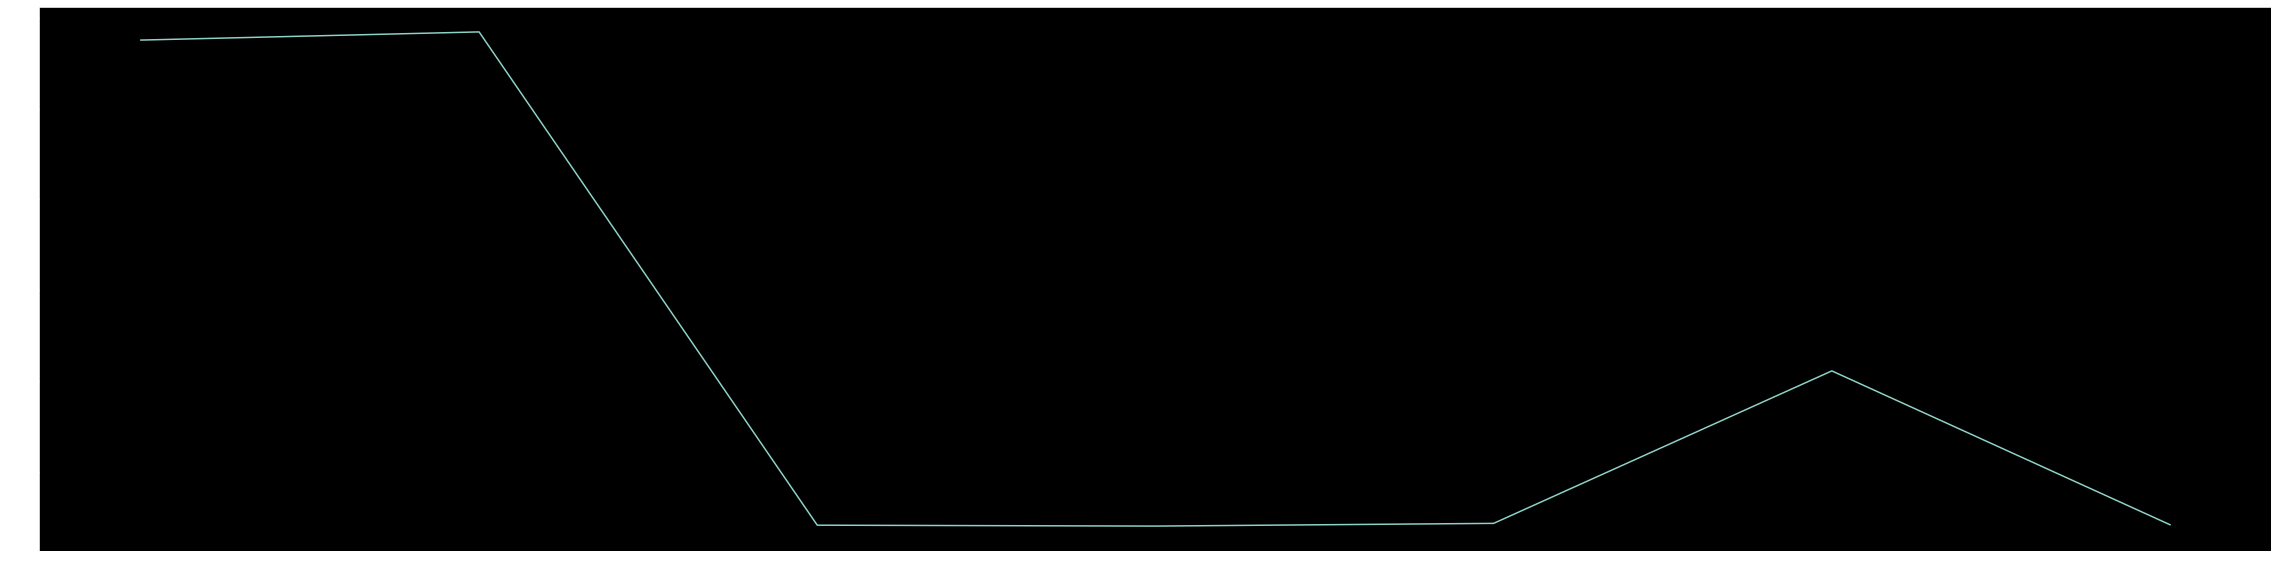

In [21]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

['Erros', 3073, 'Ativos', 7]

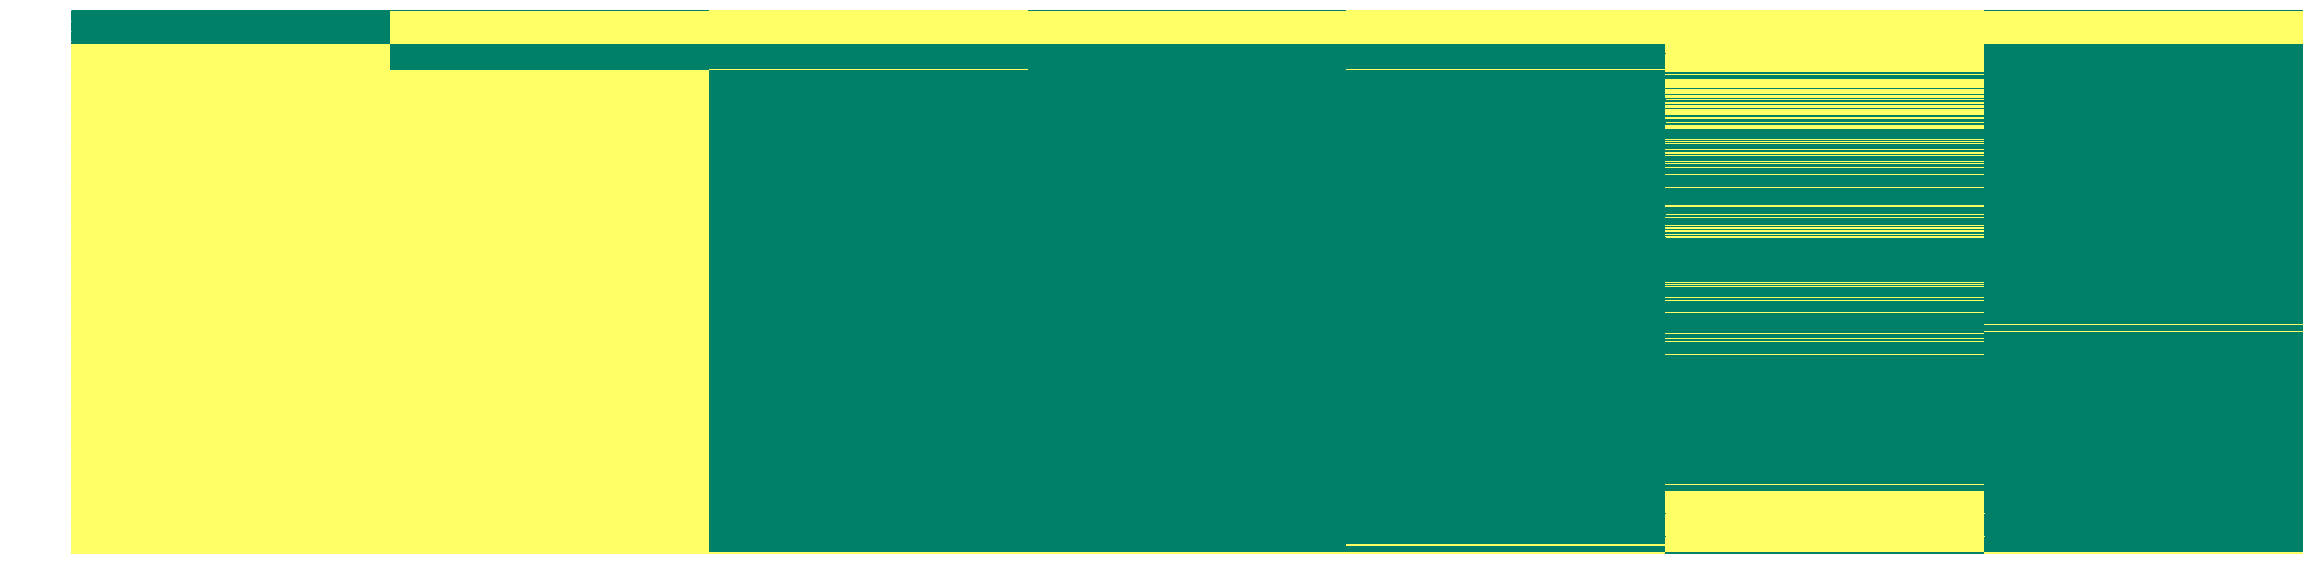

In [22]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

In [23]:
output.to_html("output.html")

<div id="Graficos">
    <h2>4) Representações Gráficas do preço e do retorno</h2>
</div>

In [24]:

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=2*365)
print(todayB,yesterdayB)

outClose= pd.DataFrame()
cols=[]

for symbol in tqdm(symbols[:20]):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
    
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)

        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
output=outClose.copy()

2021-08-15 2019-08-16


  0%|          | 0/20 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [25]:
output.columns

Index(['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA',
       'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA',
       'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA',
       'CMIG4.SA', 'COGN3.SA'],
      dtype='object')

['Erros', 416, 'Ativos', 20]

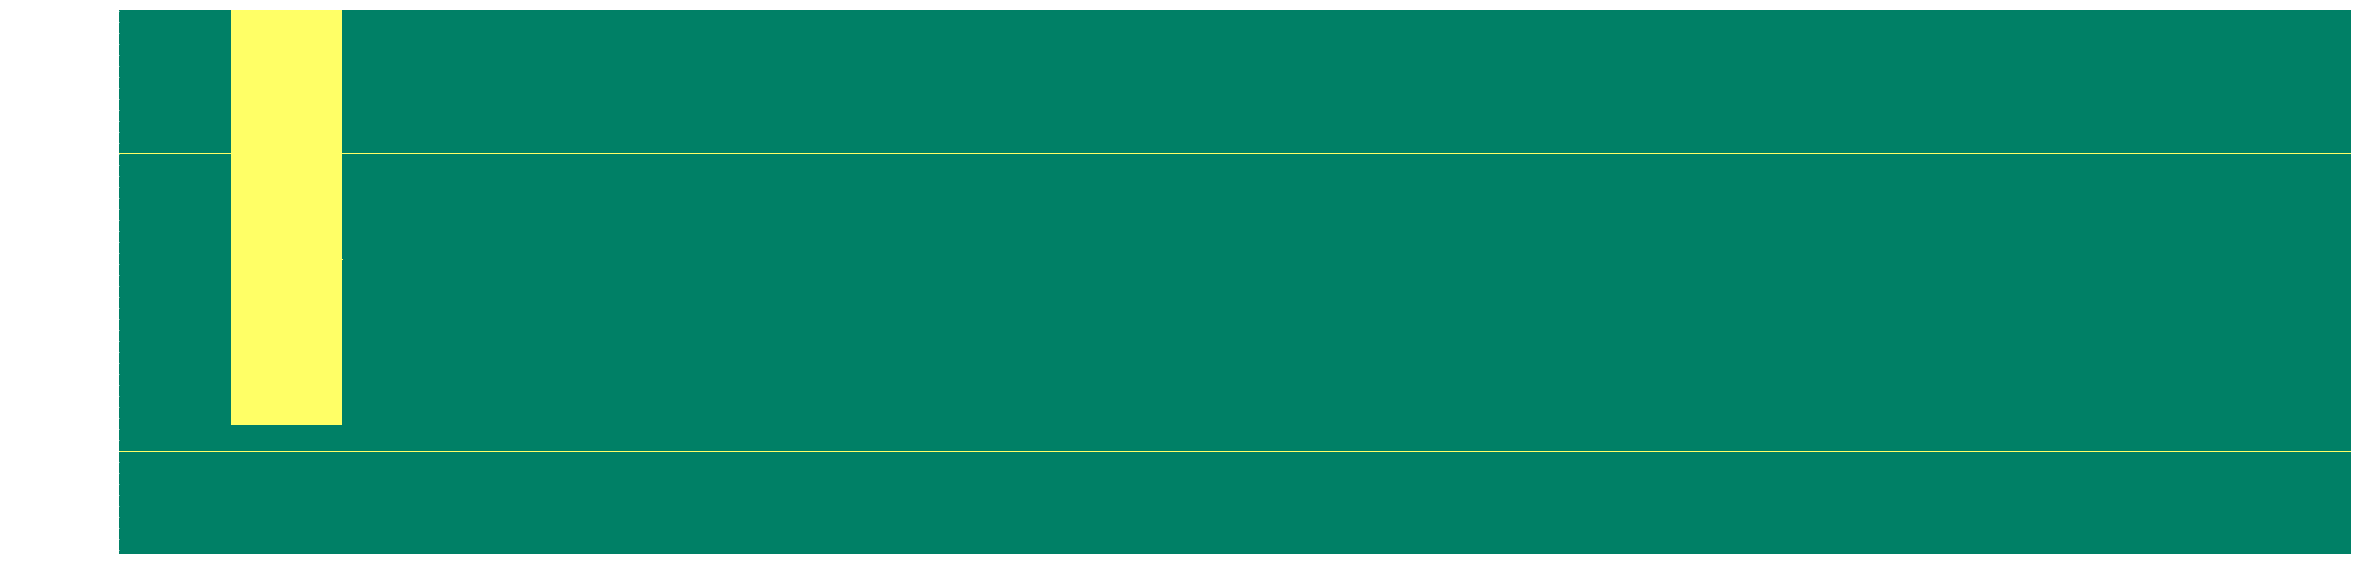

In [26]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<AxesSubplot:>

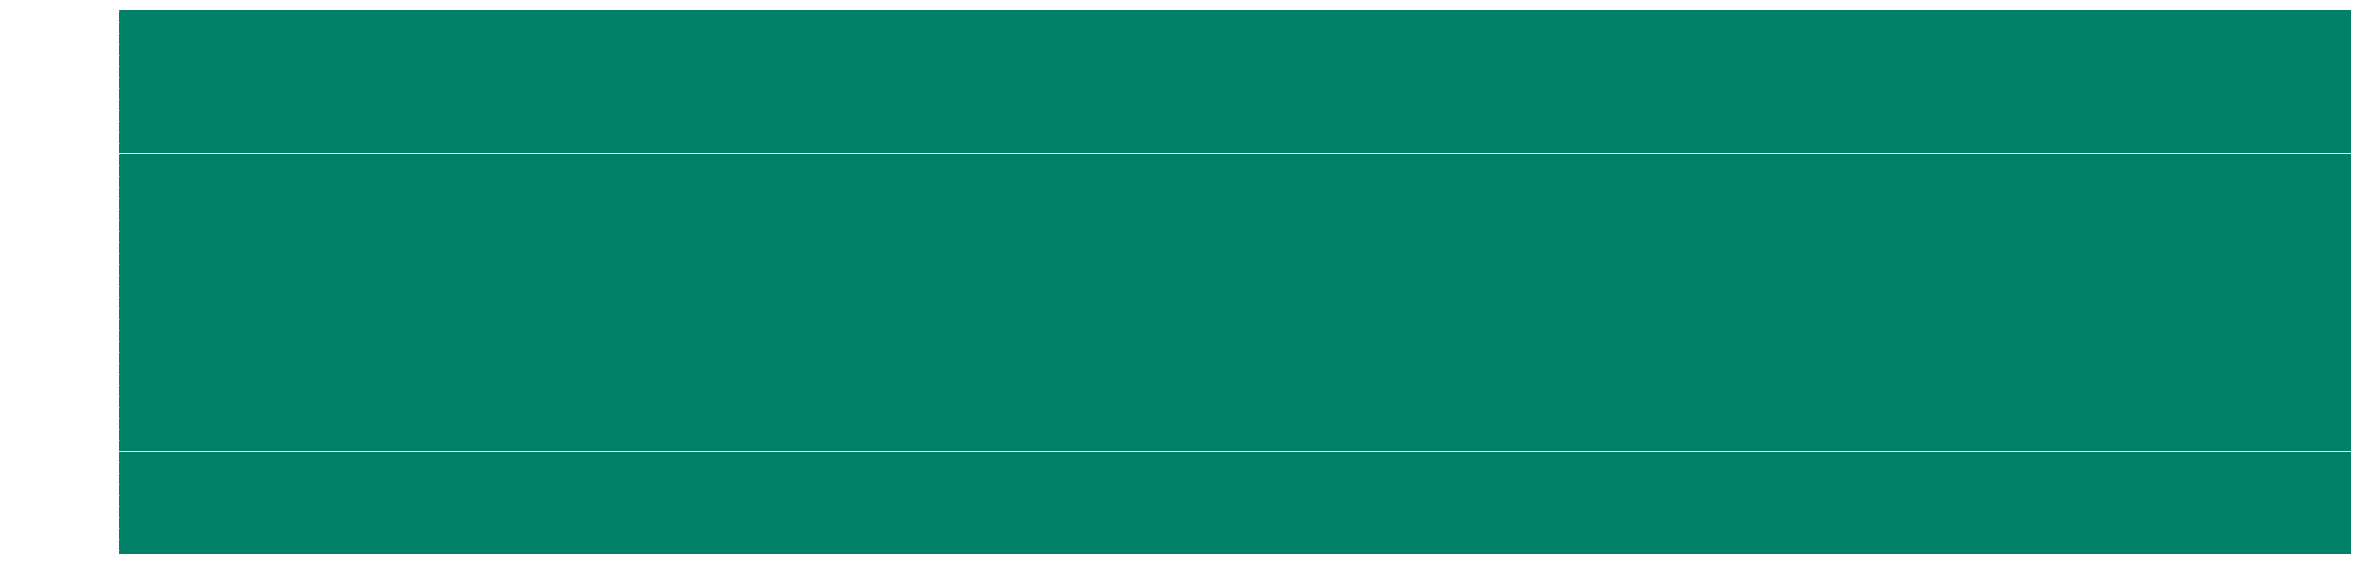

In [27]:
plt.figure(figsize=(40,10))

sns.heatmap(output[output.columns[np.where(output.isnull().sum()<3)[0]]].isnull(), 
            cbar=False, cmap = 'summer')


<AxesSubplot:>

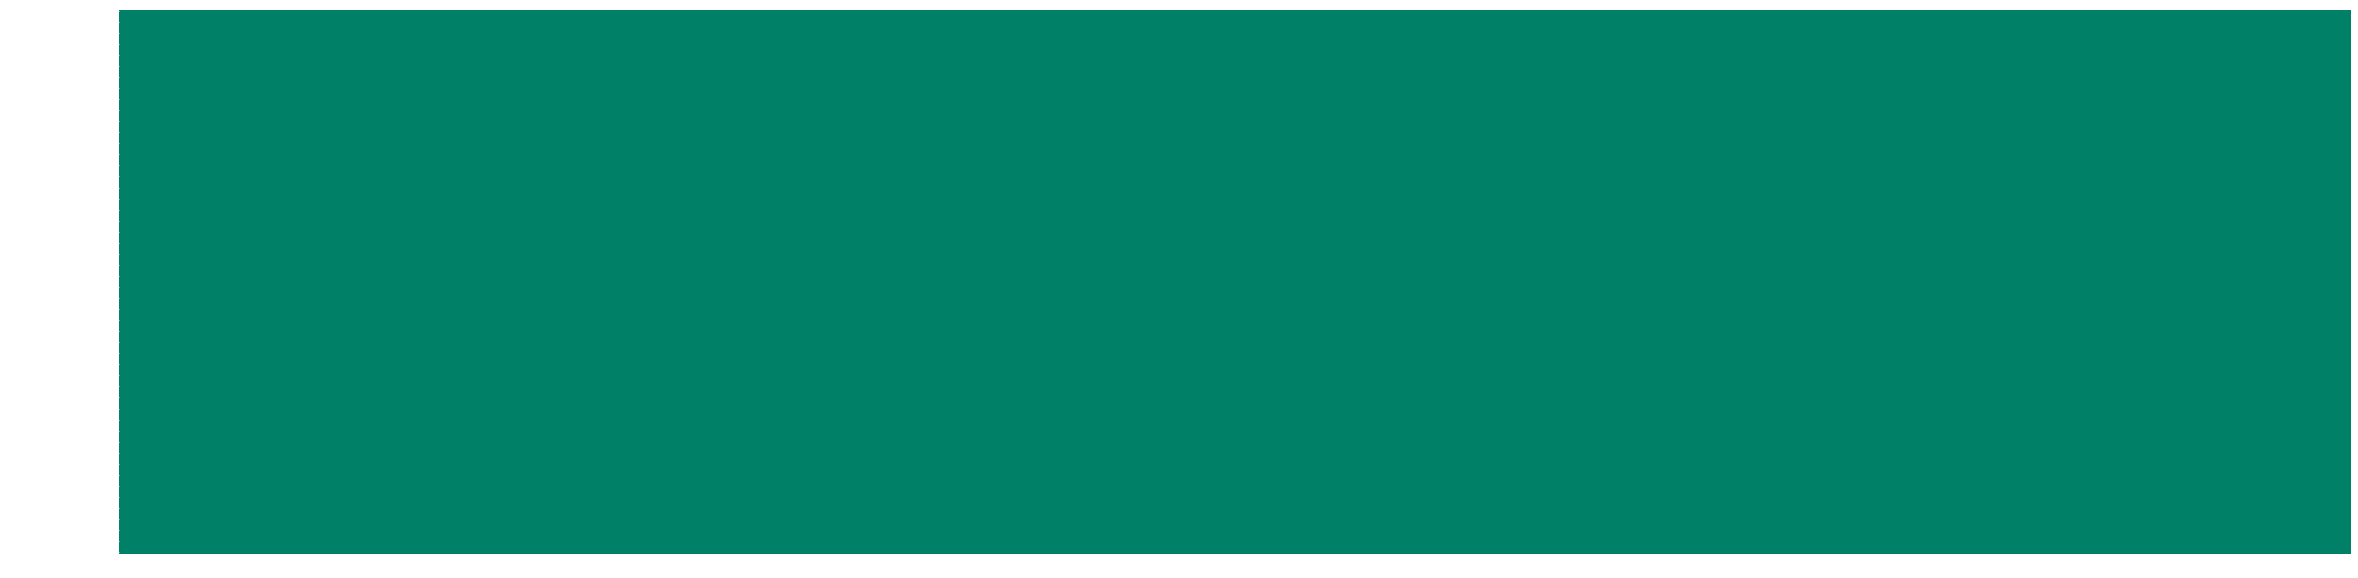

In [28]:
plt.figure(figsize=(40,10))

output=output[output.columns[np.where(output.isnull().sum()<3)[0]]].dropna()
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')


<AxesSubplot:>

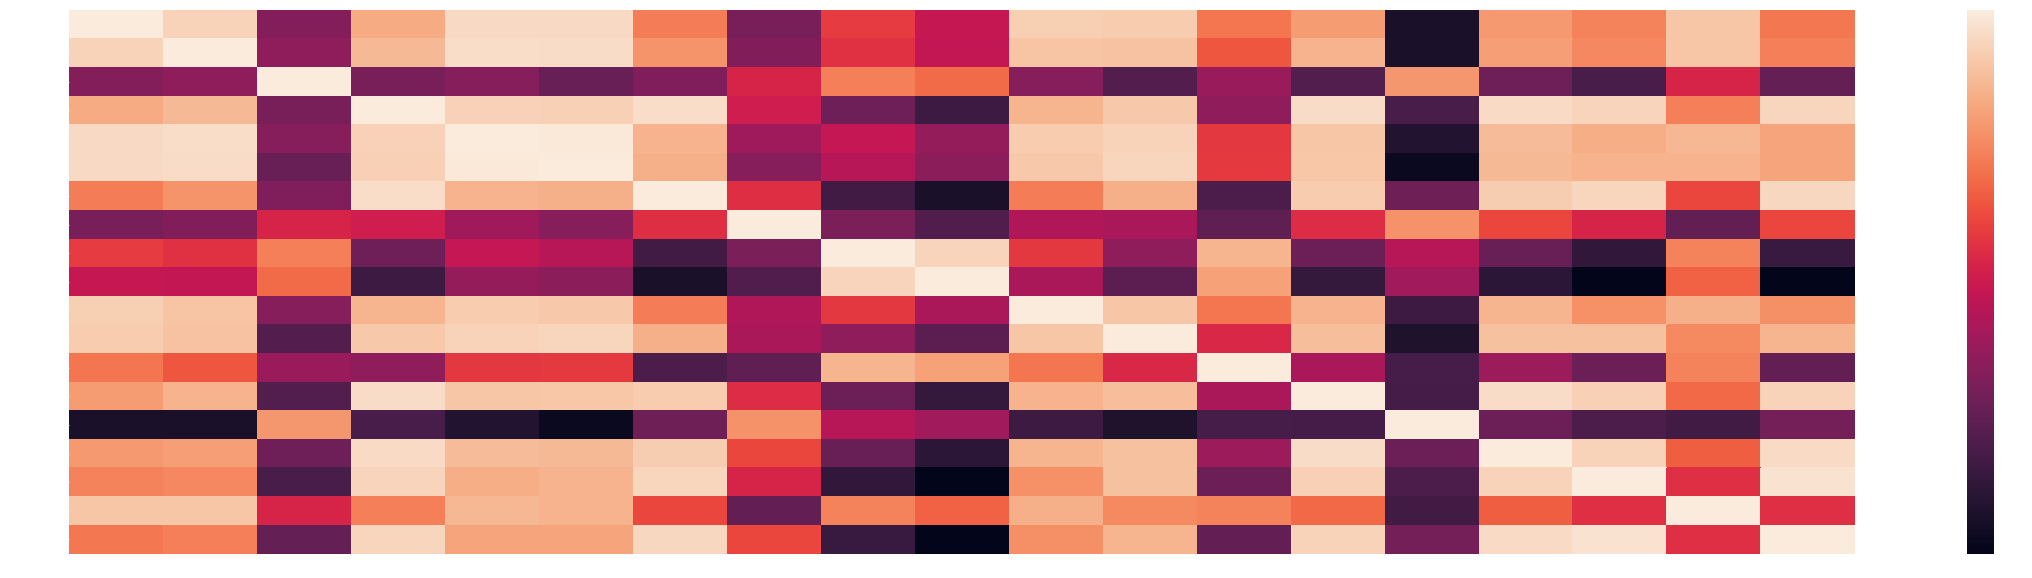

In [29]:

plt.figure(figsize=(40,10))
sns.heatmap(output.corr())

In [30]:
100*output.pct_change().describe()

ABEV3.SA      AZUL4.SA      B3SA3.SA      BBAS3.SA      BBDC3.SA  \
count  49100.000000  49100.000000  49100.000000  49100.000000  49100.000000   
mean       0.003939      0.086857      0.039991     -0.041374     -0.000684   
std        2.426855      5.368754      2.919106      3.085264      2.851775   
min      -15.781819    -36.867661    -16.120346    -16.689509    -14.349783   
25%       -1.270010     -1.930344     -1.369710     -1.374571     -1.521093   
50%        0.000000      0.018278     -0.020191     -0.149073     -0.051002   
75%        1.289313      1.926339      1.459045      1.252502      1.400356   
max        9.871250     29.873650     19.244669     17.126078     16.327601   

           BBDC4.SA      BBSE3.SA      BEEF3.SA     BPAC11.SA      BRAP4.SA  \
count  49100.000000  49100.000000  49100.000000  49100.000000  49100.000000   
mean      -0.011326     -0.074397      0.066362      0.217686      0.225929   
std        2.912081      2.131078      3.274520      4.073358      2.811764   
min      -14.274426     -9.507706    -18.574773    -26.863320    -15.280343   
25%       -1.429955     -1.202516     -1.508290     -1.587746     -1.258242   
50%        0.000000      0.042754      0.000000      0.150650      0.193080   
75%        1.345015      0.977064      1.577480      1.985137      1.557835   
max       16.866914     10.755815     18.181823     27.894093     18.251535   

           BRDT3.SA      BRFS3.SA      BRKM5.SA      BRML3.SA      BTOW3.SA  \
count  49100.000000  49100.000000  49100.000000  49100.000000  49100.000000   
mean       0.043143     -0.046076      0.230446     -0.023219      0.088762   
std        3.065671      3.232669      4.496559      3.400715      4.135589   
min      -15.293086    -19.648271    -24.473070    -23.882019    -16.972386   
25%       -1.454416     -1.474519     -1.661289     -1.618964     -1.970600   
50%        0.000000     -0.338172      0.000000     -0.086959     -0.487038   
75%        1.438219      1.228037      1.871079      1.510161      1.895779   
max       14.968561     16.278068     31.754394     15.361443     27.395351   

           CCRO3.SA      CIEL3.SA      CMIG4.SA      COGN3.SA  
count  49100.000000  49100.000000  49100.000000  49100.000000  
mean       0.001638     -0.100246      0.023967     -0.152318  
std        3.318516      3.805318      2.814977      4.111250  
min      -17.931037    -21.176467    -19.315195    -20.948616  
25%       -1.526965     -2.005745     -1.350843     -2.160943  
50%       -0.115599     -0.410677      0.000000     -0.338983  
75%        1.353969      1.342341      1.411341      1.612535  
max       22.156699     23.456784     14.254628     16.999998

In [31]:
output.pct_change().median()

ABEV3.SA     0.000000
AZUL4.SA     0.000183
B3SA3.SA    -0.000202
BBAS3.SA    -0.001491
BBDC3.SA    -0.000510
BBDC4.SA     0.000000
BBSE3.SA     0.000428
BEEF3.SA     0.000000
BPAC11.SA    0.001507
BRAP4.SA     0.001931
BRDT3.SA     0.000000
BRFS3.SA    -0.003382
BRKM5.SA     0.000000
BRML3.SA    -0.000870
BTOW3.SA    -0.004870
CCRO3.SA    -0.001156
CIEL3.SA    -0.004107
CMIG4.SA     0.000000
COGN3.SA    -0.003390
dtype: float64

In [32]:
class report(object):
    def grafic_01(output,ativo):
            fig=plt.figure(figsize=(20,5));
            stock_return = output[ativo].pct_change()
            vol=100*stock_return.rolling(12).std() * np.sqrt(12)
            ax=vol.plot(x_compat=True,style='m',label='Volatilidade', title=ativo);
            plt.ylabel("Volatilidade [%]")
            output[ativo].plot(x_compat=True, secondary_y=True, style='y--',label='Volume');
            ax.right_ax.set_ylabel('Preço')
            fig.tight_layout()
            plt.grid(False)
            pass
    def grafic_02(output,ativo):
            fig=plt.figure(figsize=(20,5));
            ax = fig.add_subplot(111)
            stock_return=100*output[ativo].pct_change()
            stock_return.hist(bins=len(output), density = True,color='c')
            stock_return.plot(kind = "kde")
            plt.axvline(stock_return.mean(), color='k', linestyle='dashed', linewidth=5)            
            plt.title(ativo+': RMD = '+str(round(stock_return.mean(),2))+'% e '+'SMD = '
                      +str(round(stock_return.std(),2))+'%',fontsize=16)  
            ax.grid(False)
            ax.set_xlabel("Retorno Diário [%]", fontsize=12)
            ax.set_ylabel("Densidade", fontsize=12)
            fig.tight_layout()
            pass
    def grafic_03(output,ativo1,ativo2):
            ativo1_close_return=100*output[ativo1].pct_change().dropna()
            ativo2_close_return=100*output[ativo2].pct_change().dropna()        
            X = ativo1_close_return
            X = sm.add_constant(X)
            y = ativo2_close_return
            model = sm.OLS(y,X).fit()
            beta = model.params[1]
            alpha = model.params[0]
            fig, ax1 = plt.subplots(1,figsize=(5,5))
            ax1.scatter(X[X.columns[1]],y,label="Retorno Diário", color='blue', edgecolors='none', alpha=0.7)
            X_prime_0 = np.linspace(X[X.columns[1]].min(),X[X.columns[1]].max(), 100)
            X_prime = sm.add_constant(X_prime_0)
            y_hat = model.predict(X_prime)
            ax1.scatter(X_prime_0,y_hat,label="Retorno Diário", color='red', edgecolors='none', alpha=0.5)
            ax1.grid(True)
            ax1.set_xlabel("Retorno Diário "+ativo1+" [%]",fontsize=16)
            ax1.set_ylabel("Retorno Diário "+ativo2+" [%]", fontsize=16)
            ax1.set_title("Alpha = "+str(round(alpha,2))+", Beta = "+str(round(beta,2)), fontsize=16)
            return model
    def grafic_04(output):
            fig = plt.figure(figsize=(20, 5))
            ax = fig.add_subplot(111)
            bp = ax.boxplot(output.values)
            pass
    def grafic_05(output):
            sns.pairplot(output)
            pass

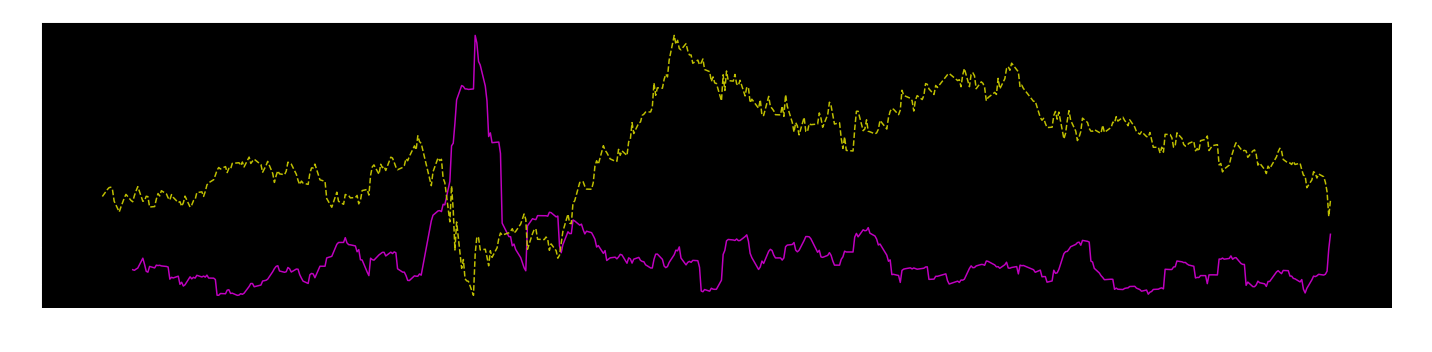

In [33]:
%matplotlib inline 
report.grafic_01(output,'B3SA3.SA')

<AxesSubplot:>

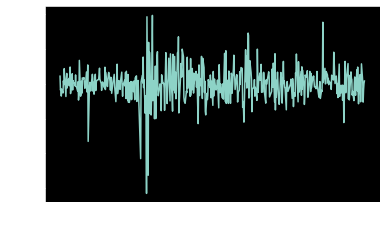

In [34]:
output[output.columns[0]].pct_change().plot()

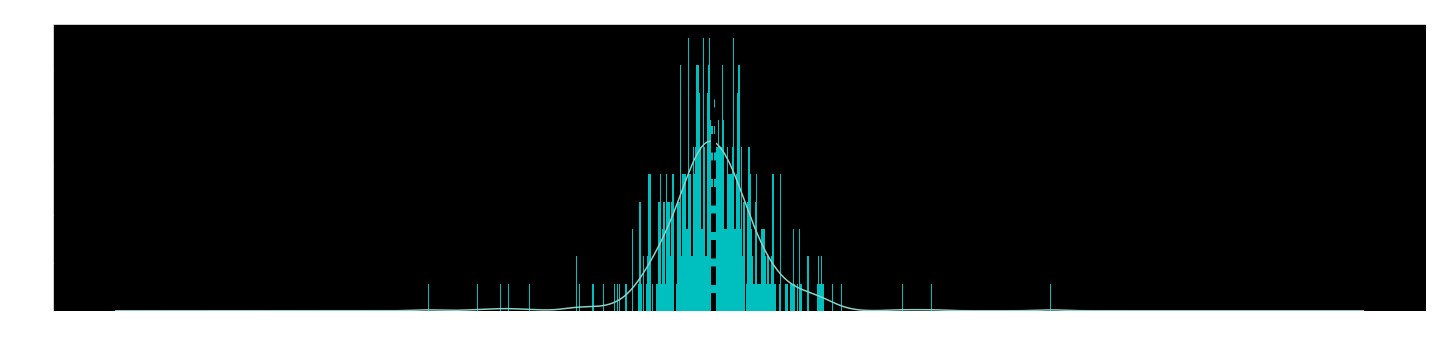

In [35]:
%matplotlib inline 
report.grafic_02(output,'B3SA3.SA')

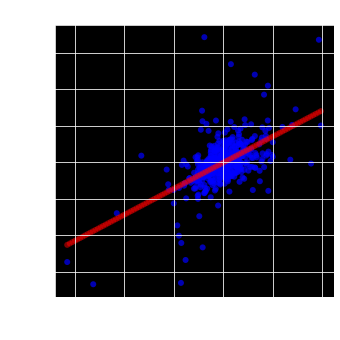

In [37]:
%matplotlib inline 
import statsmodels.api as sm
model=report.grafic_03(output,'ABEV3.SA','BBAS3.SA')

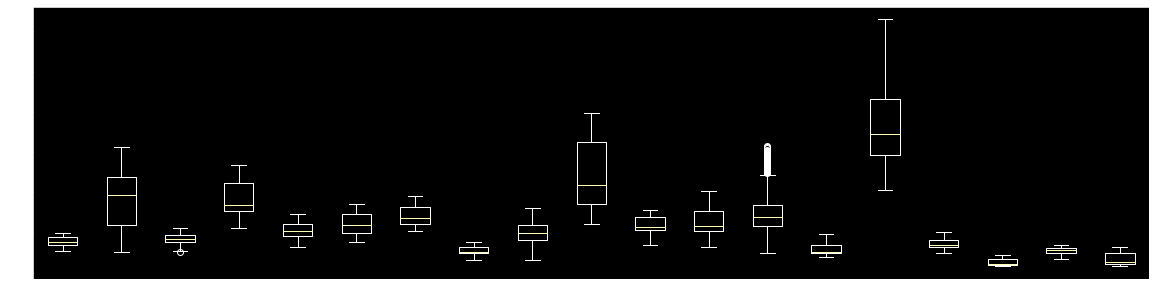

In [38]:
%matplotlib inline 
report.grafic_04(output)

In [39]:
100*output.pct_change().describe()

ABEV3.SA      AZUL4.SA      B3SA3.SA      BBAS3.SA      BBDC3.SA  \
count  49100.000000  49100.000000  49100.000000  49100.000000  49100.000000   
mean       0.003939      0.086857      0.039991     -0.041374     -0.000684   
std        2.426855      5.368754      2.919106      3.085264      2.851775   
min      -15.781819    -36.867661    -16.120346    -16.689509    -14.349783   
25%       -1.270010     -1.930344     -1.369710     -1.374571     -1.521093   
50%        0.000000      0.018278     -0.020191     -0.149073     -0.051002   
75%        1.289313      1.926339      1.459045      1.252502      1.400356   
max        9.871250     29.873650     19.244669     17.126078     16.327601   

           BBDC4.SA      BBSE3.SA      BEEF3.SA     BPAC11.SA      BRAP4.SA  \
count  49100.000000  49100.000000  49100.000000  49100.000000  49100.000000   
mean      -0.011326     -0.074397      0.066362      0.217686      0.225929   
std        2.912081      2.131078      3.274520      4.073358      2.811764   
min      -14.274426     -9.507706    -18.574773    -26.863320    -15.280343   
25%       -1.429955     -1.202516     -1.508290     -1.587746     -1.258242   
50%        0.000000      0.042754      0.000000      0.150650      0.193080   
75%        1.345015      0.977064      1.577480      1.985137      1.557835   
max       16.866914     10.755815     18.181823     27.894093     18.251535   

           BRDT3.SA      BRFS3.SA      BRKM5.SA      BRML3.SA      BTOW3.SA  \
count  49100.000000  49100.000000  49100.000000  49100.000000  49100.000000   
mean       0.043143     -0.046076      0.230446     -0.023219      0.088762   
std        3.065671      3.232669      4.496559      3.400715      4.135589   
min      -15.293086    -19.648271    -24.473070    -23.882019    -16.972386   
25%       -1.454416     -1.474519     -1.661289     -1.618964     -1.970600   
50%        0.000000     -0.338172      0.000000     -0.086959     -0.487038   
75%        1.438219      1.228037      1.871079      1.510161      1.895779   
max       14.968561     16.278068     31.754394     15.361443     27.395351   

           CCRO3.SA      CIEL3.SA      CMIG4.SA      COGN3.SA  
count  49100.000000  49100.000000  49100.000000  49100.000000  
mean       0.001638     -0.100246      0.023967     -0.152318  
std        3.318516      3.805318      2.814977      4.111250  
min      -17.931037    -21.176467    -19.315195    -20.948616  
25%       -1.526965     -2.005745     -1.350843     -2.160943  
50%       -0.115599     -0.410677      0.000000     -0.338983  
75%        1.353969      1.342341      1.411341      1.612535  
max       22.156699     23.456784     14.254628     16.999998

In [40]:
output.corr()

ABEV3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  \
ABEV3.SA   1.000000  0.892838 -0.103417  0.726895  0.918353  0.917359   
AZUL4.SA   0.892838  1.000000 -0.058983  0.783324  0.937336  0.931001   
B3SA3.SA  -0.103417 -0.058983  1.000000 -0.150719 -0.102759 -0.214943   
BBAS3.SA   0.726895  0.783324 -0.150719  1.000000  0.889057  0.878800   
BBDC3.SA   0.918353  0.937336 -0.102759  0.889057  1.000000  0.987013   
BBDC4.SA   0.917359  0.931001 -0.214943  0.878800  0.987013  1.000000   
BBSE3.SA   0.549410  0.633427 -0.127016  0.936420  0.759008  0.742363   
BEEF3.SA  -0.148983 -0.118014  0.226196  0.184436 -0.006975 -0.100080   
BPAC11.SA  0.323918  0.285409  0.556161 -0.192151  0.142299  0.087061   
BRAP4.SA   0.144438  0.134306  0.485887 -0.398341 -0.041670 -0.082077   
BRDT3.SA   0.871611  0.831055 -0.098818  0.765346  0.857505  0.850031   
BRFS3.SA   0.857848  0.822539 -0.300646  0.848134  0.892057  0.903322   
BRKM5.SA   0.525556  0.410226 -0.021129 -0.059580  0.311512  0.317815   
BRML3.SA   0.667644  0.754471 -0.306324  0.929428  0.834884  0.839726   
BTOW3.SA  -0.547832 -0.546346  0.644709 -0.337145 -0.510776 -0.609899   
CCRO3.SA   0.651955  0.669592 -0.188239  0.922677  0.797504  0.779614   
CIEL3.SA   0.570342  0.587819 -0.338526  0.901081  0.734560  0.754466   
CMIG4.SA   0.836614  0.837623  0.222275  0.558546  0.775108  0.753941   
COGN3.SA   0.528841  0.554481 -0.227404  0.903596  0.697400  0.695521   

           BBSE3.SA  BEEF3.SA  BPAC11.SA  BRAP4.SA  BRDT3.SA  BRFS3.SA  \
ABEV3.SA   0.549410 -0.148983   0.323918  0.144438  0.871611  0.857848   
AZUL4.SA   0.633427 -0.118014   0.285409  0.134306  0.831055  0.822539   
B3SA3.SA  -0.127016  0.226196   0.556161  0.485887 -0.098818 -0.300646   
BBAS3.SA   0.936420  0.184436  -0.192151 -0.398341  0.765346  0.848134   
BBDC3.SA   0.759008 -0.006975   0.142299 -0.041670  0.857505  0.892057   
BBDC4.SA   0.742363 -0.100080   0.087061 -0.082077  0.850031  0.903322   
BBSE3.SA   1.000000  0.271542  -0.375190 -0.548630  0.551969  0.741571   
BEEF3.SA   0.271542  1.000000  -0.137621 -0.310922  0.056504  0.041830   
BPAC11.SA -0.375190 -0.137621   1.000000  0.896559  0.306047 -0.063891   
BRAP4.SA  -0.548630 -0.310922   0.896559  1.000000  0.038585 -0.260474   
BRDT3.SA   0.551969  0.056504   0.306047  0.038585  1.000000  0.833150   
BRFS3.SA   0.741571  0.041830  -0.063891 -0.260474  0.833150  1.000000   
BRKM5.SA  -0.324675 -0.246958   0.762829  0.684172  0.524489  0.242311   
BRML3.SA   0.861792  0.263182  -0.206676 -0.429015  0.756640  0.801805   
BTOW3.SA  -0.194672  0.624453   0.087771  0.001010 -0.396521 -0.527316   
CCRO3.SA   0.868131  0.360869  -0.216335 -0.471259  0.763521  0.812132   
CIEL3.SA   0.904851  0.222436  -0.440603 -0.660998  0.617611  0.813070   
CMIG4.SA   0.359624 -0.236998   0.569646  0.449909  0.744061  0.593723   
COGN3.SA   0.912377  0.360980  -0.412698 -0.658410  0.614639  0.764024   

           BRKM5.SA  BRML3.SA  BTOW3.SA  CCRO3.SA  CIEL3.SA  CMIG4.SA  \
ABEV3.SA   0.525556  0.667644 -0.547832  0.651955  0.570342  0.836614   
AZUL4.SA   0.410226  0.754471 -0.546346  0.669592  0.587819  0.837623   
B3SA3.SA  -0.021129 -0.306324  0.644709 -0.188239 -0.338526  0.222275   
BBAS3.SA  -0.059580  0.929428 -0.337145  0.922677  0.901081  0.558546   
BBDC3.SA   0.311512  0.834884 -0.510776  0.797504  0.734560  0.775108   
BBDC4.SA   0.317815  0.839726 -0.609899  0.779614  0.754466  0.753941   
BBSE3.SA  -0.324675  0.861792 -0.194672  0.868131  0.904851  0.359624   
BEEF3.SA  -0.246958  0.263182  0.624453  0.360869  0.222436 -0.236998   
BPAC11.SA  0.762829 -0.206676  0.087771 -0.216335 -0.440603  0.569646   
BRAP4.SA   0.684172 -0.429015  0.001010 -0.471259 -0.660998  0.449909   
BRDT3.SA   0.524489  0.756640 -0.396521  0.763521  0.617611  0.744061   
BRFS3.SA   0.242311  0.801805 -0.527316  0.812132  0.813070  0.593723   
BRKM5.SA   1.000000  0.036306 -0.350589 -0.015492 -0.204769  0.569209   
BRML3.SA   0.036306  1.000000 -0.359616  0.9323

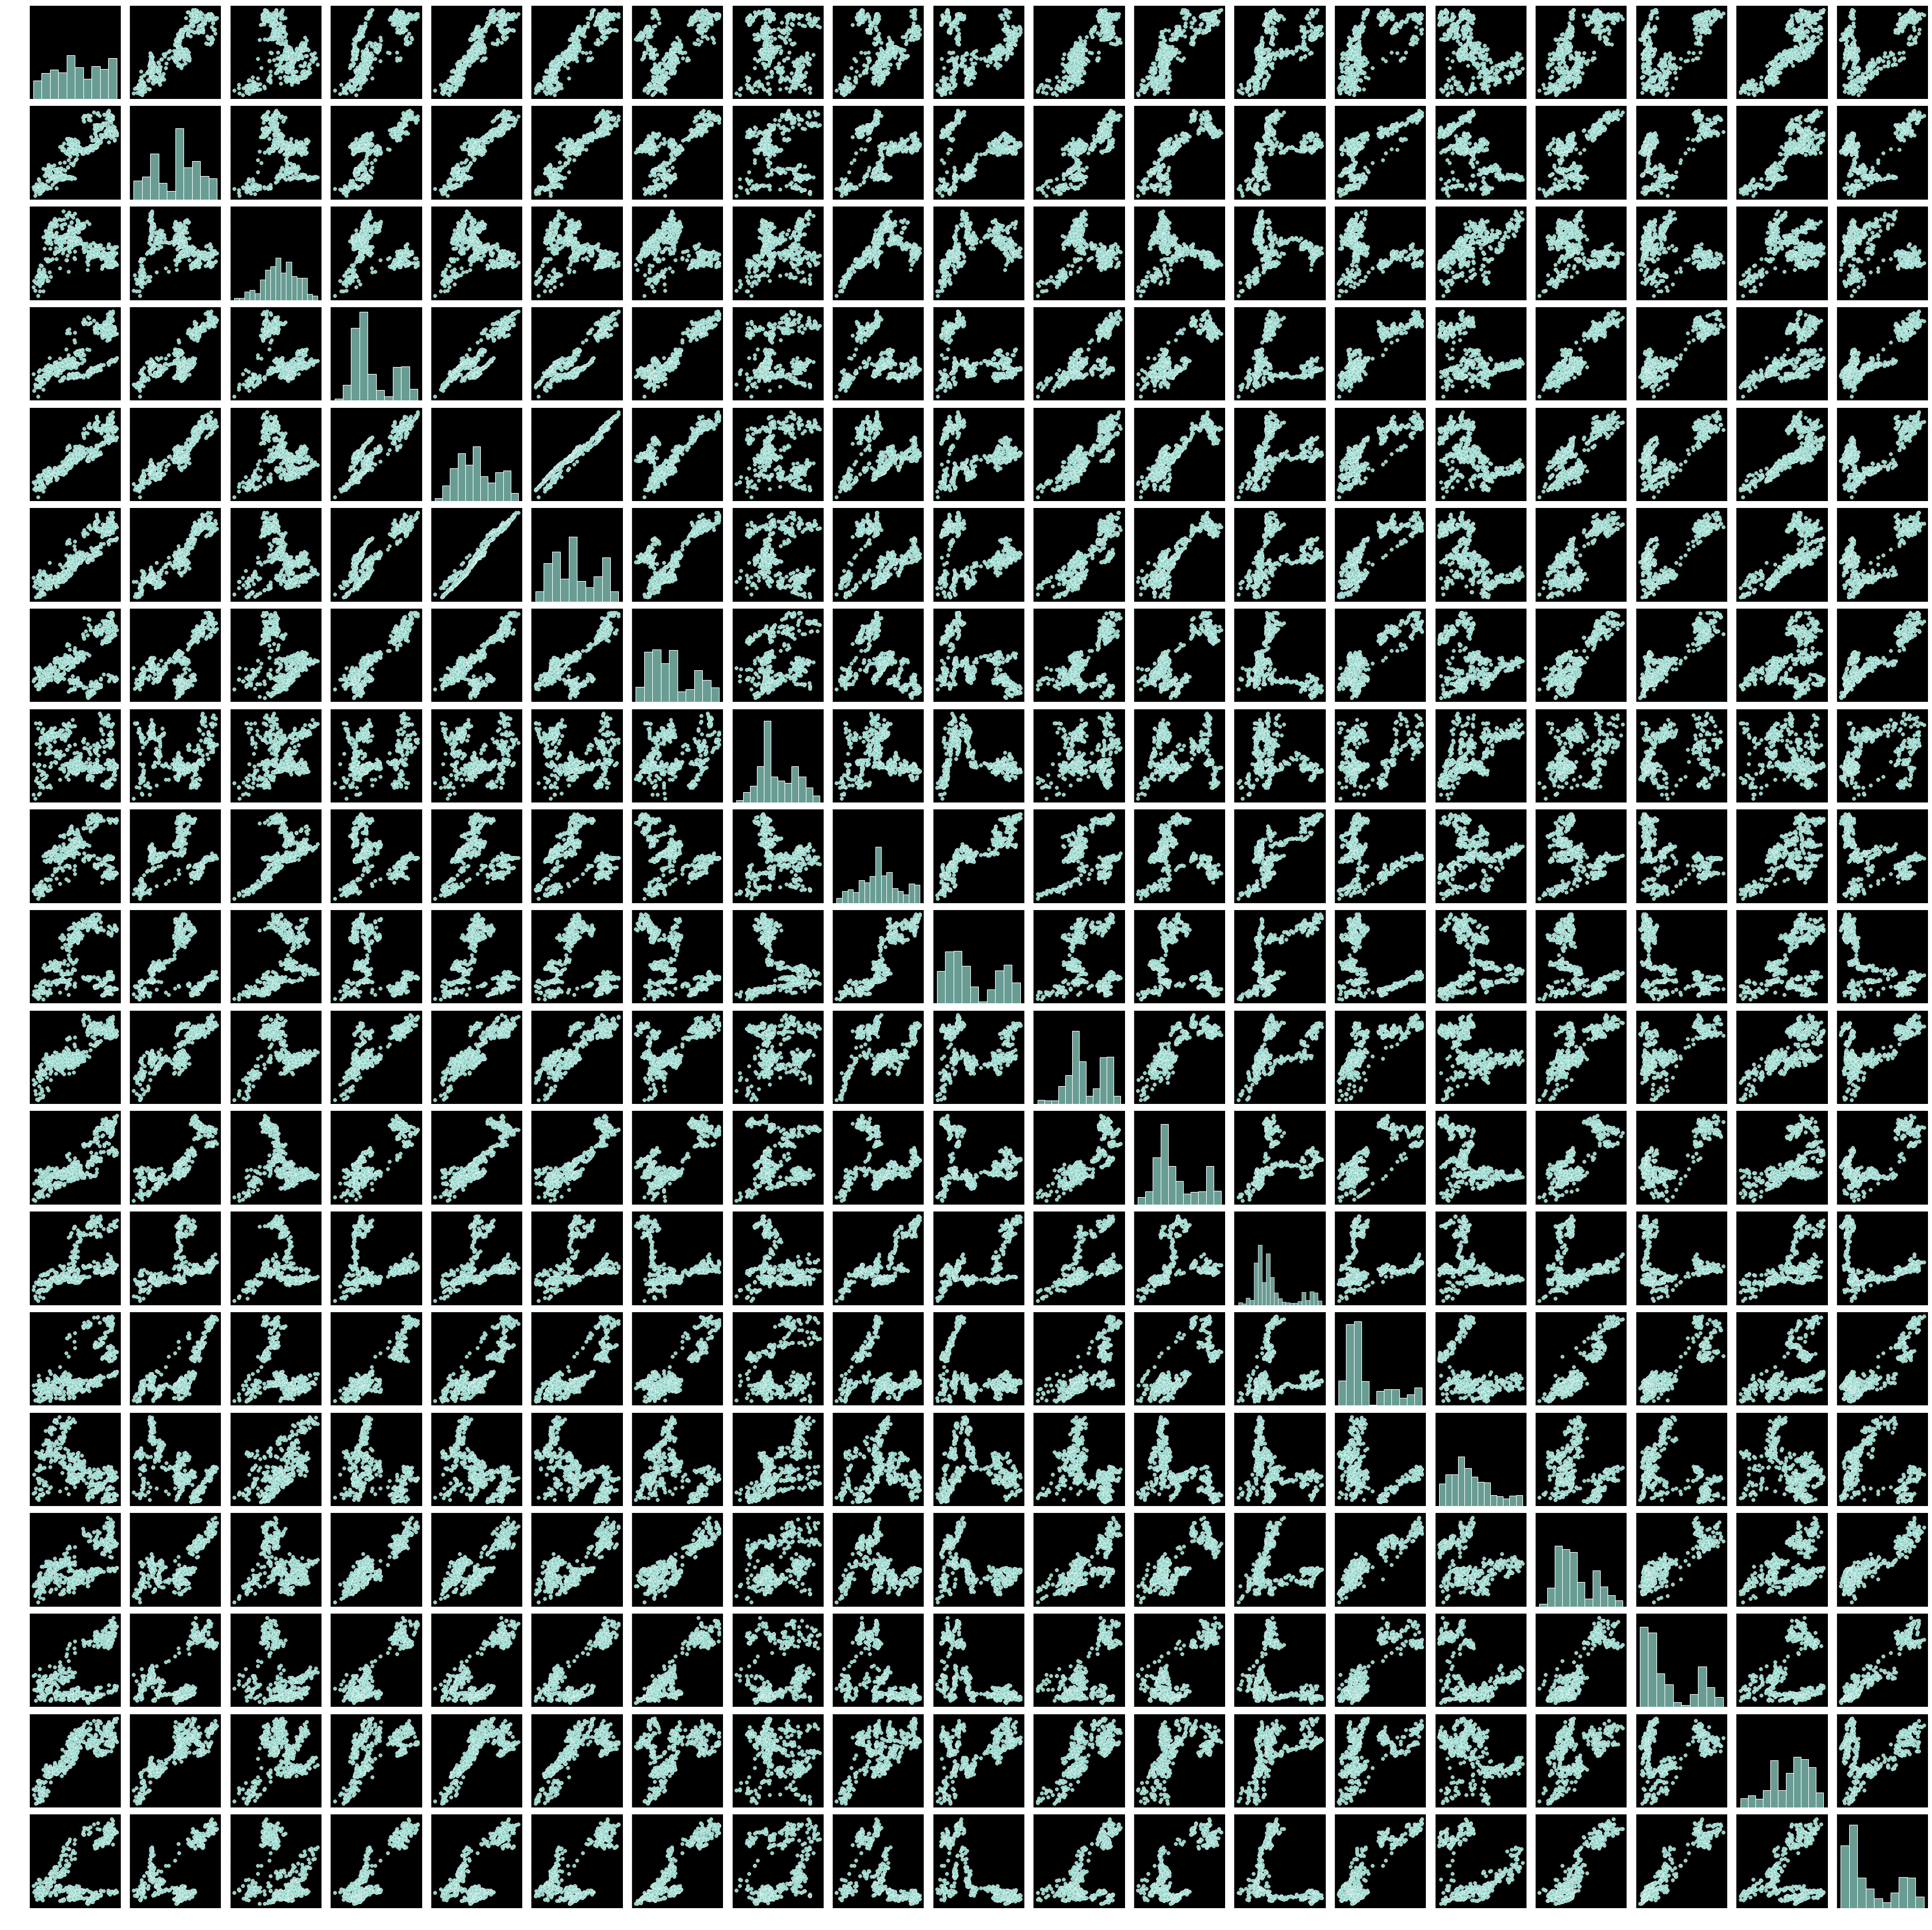

In [41]:
#%matplotlib inline 
report.grafic_05(output)

In [42]:
output.pct_change().iloc[1:].corr()

ABEV3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  \
ABEV3.SA   1.000000  0.527634  0.462156  0.560879  0.612307  0.588348   
AZUL4.SA   0.527634  1.000000  0.548046  0.658913  0.629443  0.634478   
B3SA3.SA   0.462156  0.548046  1.000000  0.666446  0.651448  0.607602   
BBAS3.SA   0.560879  0.658913  0.666446  1.000000  0.897698  0.878681   
BBDC3.SA   0.612307  0.629443  0.651448  0.897698  1.000000  0.958957   
BBDC4.SA   0.588348  0.634478  0.607602  0.878681  0.958957  1.000000   
BBSE3.SA   0.489211  0.455233  0.590659  0.645564  0.663764  0.634574   
BEEF3.SA   0.254999  0.274523  0.290643  0.253708  0.251423  0.236286   
BPAC11.SA  0.435686  0.560102  0.647241  0.629702  0.632477  0.605154   
BRAP4.SA   0.375495  0.410276  0.481986  0.504523  0.538783  0.509022   
BRDT3.SA   0.533086  0.588453  0.622367  0.712768  0.677922  0.638364   
BRFS3.SA   0.433926  0.439353  0.415030  0.475532  0.470616  0.480014   
BRKM5.SA   0.453763  0.508682  0.484440  0.586726  0.548923  0.517883   
BRML3.SA   0.496685  0.675648  0.572328  0.670453  0.647695  0.650240   
BTOW3.SA   0.336378  0.358975  0.487802  0.418935  0.402586  0.365715   
CCRO3.SA   0.480628  0.634889  0.704633  0.717014  0.676393  0.647319   
CIEL3.SA   0.423448  0.468583  0.461369  0.538958  0.510165  0.489795   
CMIG4.SA   0.593410  0.607188  0.595239  0.705422  0.712318  0.688535   
COGN3.SA   0.548952  0.611279  0.512418  0.598615  0.580473  0.561693   

           BBSE3.SA  BEEF3.SA  BPAC11.SA  BRAP4.SA  BRDT3.SA  BRFS3.SA  \
ABEV3.SA   0.489211  0.254999   0.435686  0.375495  0.533086  0.433926   
AZUL4.SA   0.455233  0.274523   0.560102  0.410276  0.588453  0.439353   
B3SA3.SA   0.590659  0.290643   0.647241  0.481986  0.622367  0.415030   
BBAS3.SA   0.645564  0.253708   0.629702  0.504523  0.712768  0.475532   
BBDC3.SA   0.663764  0.251423   0.632477  0.538783  0.677922  0.470616   
BBDC4.SA   0.634574  0.236286   0.605154  0.509022  0.638364  0.480014   
BBSE3.SA   1.000000  0.140249   0.535548  0.423443  0.562237  0.377666   
BEEF3.SA   0.140249  1.000000   0.294121  0.342137  0.227116  0.512130   
BPAC11.SA  0.535548  0.294121   1.000000  0.406750  0.576579  0.401876   
BRAP4.SA   0.423443  0.342137   0.406750  1.000000  0.431163  0.398299   
BRDT3.SA   0.562237  0.227116   0.576579  0.431163  1.000000  0.429226   
BRFS3.SA   0.377666  0.512130   0.401876  0.398299  0.429226  1.000000   
BRKM5.SA   0.422028  0.266645   0.492018  0.455921  0.516956  0.475668   
BRML3.SA   0.503002  0.220929   0.571493  0.333894  0.643821  0.441909   
BTOW3.SA   0.457553  0.346731   0.480349  0.381821  0.434546  0.367561   
CCRO3.SA   0.574484  0.302955   0.630322  0.497121  0.673041  0.459024   
CIEL3.SA   0.483595  0.168566   0.437195  0.371657  0.492841  0.262207   
CMIG4.SA   0.574763  0.274195   0.609999  0.420982  0.628610  0.459516   
COGN3.SA   0.495389  0.223349   0.506141  0.376174  0.589062  0.376934   

           BRKM5.SA  BRML3.SA  BTOW3.SA  CCRO3.SA  CIEL3.SA  CMIG4.SA  \
ABEV3.SA   0.453763  0.496685  0.336378  0.480628  0.423448  0.593410   
AZUL4.SA   0.508682  0.675648  0.358975  0.634889  0.468583  0.607188   
B3SA3.SA   0.484440  0.572328  0.487802  0.704633  0.461369  0.595239   
BBAS3.SA   0.586726  0.670453  0.418935  0.717014  0.538958  0.705422   
BBDC3.SA   0.548923  0.647695  0.402586  0.676393  0.510165  0.712318   
BBDC4.SA   0.517883  0.650240  0.365715  0.647319  0.489795  0.688535   
BBSE3.SA   0.422028  0.503002  0.457553  0.574484  0.483595  0.574763   
BEEF3.SA   0.266645  0.220929  0.346731  0.302955  0.168566  0.274195   
BPAC11.SA  0.492018  0.571493  0.480349  0.630322  0.437195  0.609999   
BRAP4.SA   0.455921  0.333894  0.381821  0.497121  0.371657  0.420982   
BRDT3.SA   0.516956  0.643821  0.434546  0.673041  0.492841  0.628610   
BRFS3.SA   0.475668  0.441909  0.367561  0.459024  0.262207  0.459516   
BRKM5.SA   1.000000  0.528029  0.355080  0.537438  0.413974  0.539913   
BRML3.SA   0.528029  1.000000  0.371082  0.6299

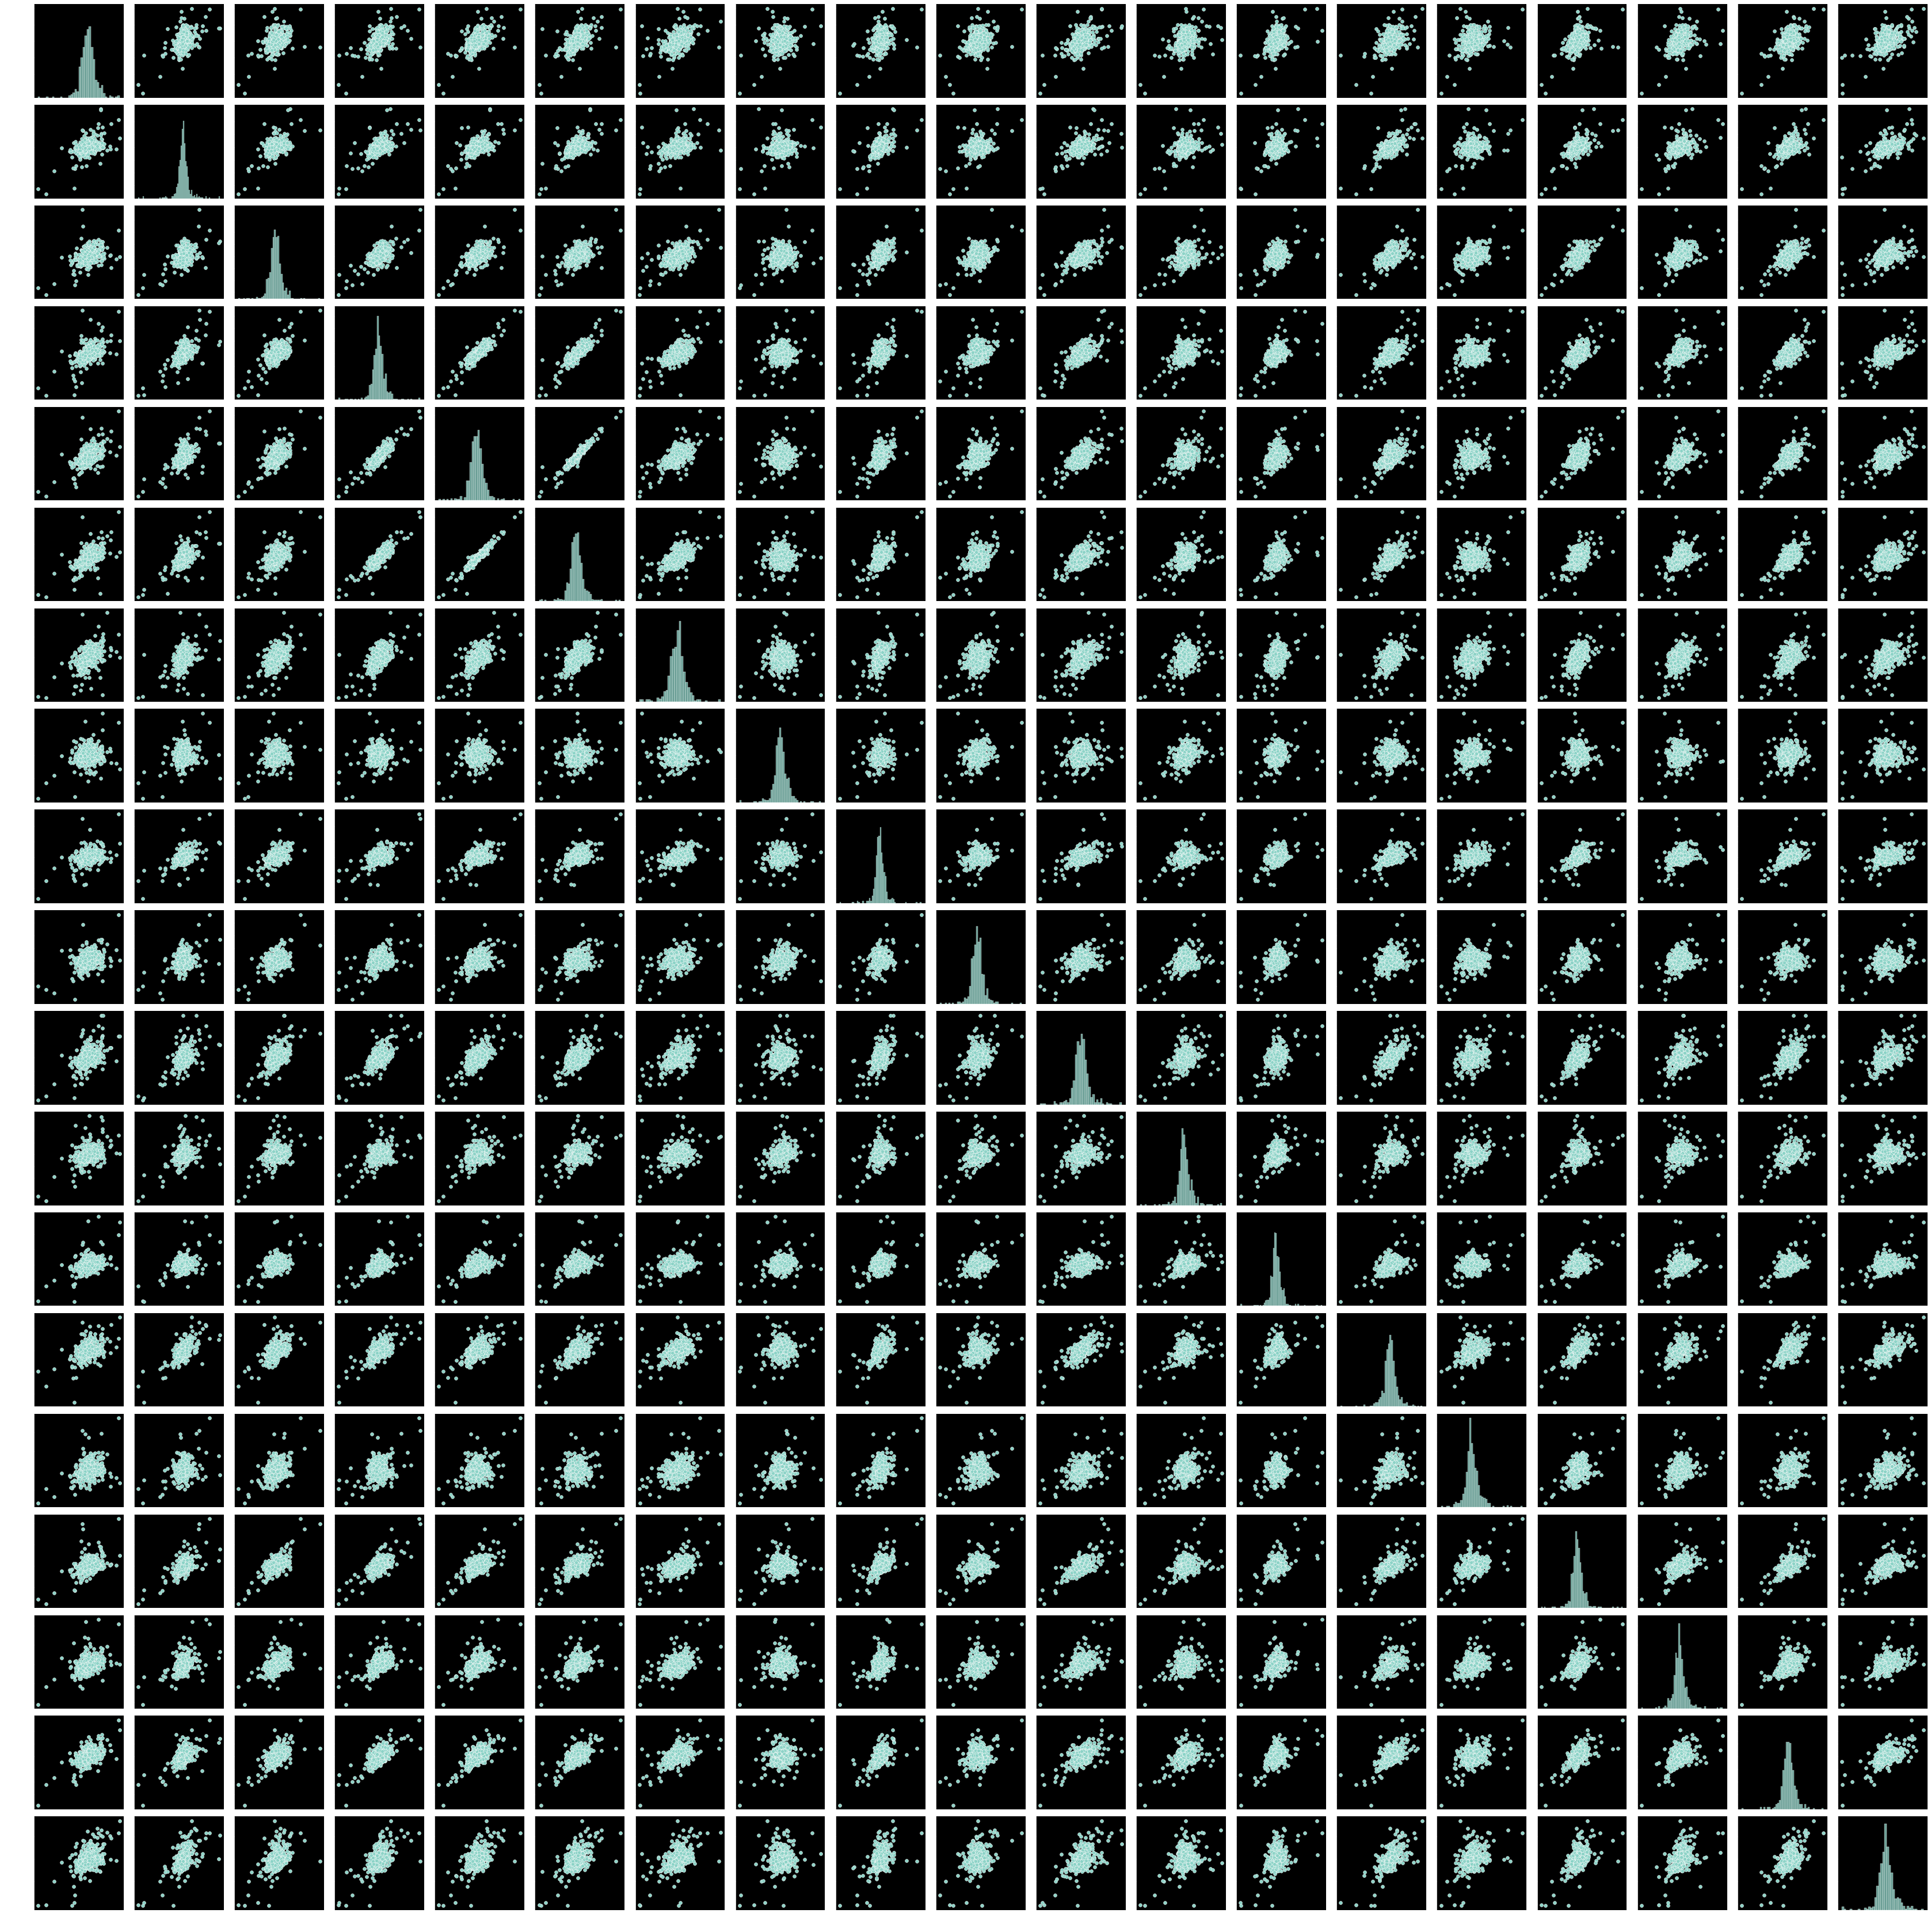

In [43]:
%matplotlib inline 
report.grafic_05(output.pct_change().dropna())